In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading dataset in pandas
df = pd.read_csv('USA_Housing.csv')
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [3]:
# General information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
#Duplicate values in dataset
print('Duplicate Values : ',df.duplicated().sum())

# Null values in dataset
print('\nNull Values : ')
print( df.isnull().sum())

Duplicate Values :  0

Null Values : 
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [5]:
# Creating new dataframe and chnging the datatypes of the features 
data = pd.DataFrame()

data['Income']          = df['Avg. Area Income'].apply(int)
data['House Age']       = df['Avg. Area House Age'].apply(int)
data['No. of Rooms']    = df['Avg. Area Number of Rooms'].apply(int)
data['No. of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)
data['Area Population'] = df['Area Population'].apply(int)
data['Income']          = df['Avg. Area Income'].apply(int)
data['State']           = df['Address'].apply(lambda x: re.search(r'\b[A-Z]{2}\b', x).group())
data['Price']           = df['Price']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           5000 non-null   int64  
 1   House Age        5000 non-null   int64  
 2   No. of Rooms     5000 non-null   int64  
 3   No. of Bedrooms  5000 non-null   int64  
 4   Area Population  5000 non-null   int64  
 5   State            5000 non-null   object 
 6   Price            5000 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 273.6+ KB


In [7]:
print('Unique values per column :')
for i in data.columns :
    print()
    print(i,' : ', data[i].nunique(), data[i].unique())

Unique values per column :

Income  :  4714 [79545 79248 61287 ... 60567 78491 63390]

House Age  :  8 [5 6 7 4 8 3 2 9]

No. of Rooms  :  8 [ 7  6  8  5  4  9  3 10]

No. of Bedrooms  :  5 [4 3 5 2 6]

Area Population  :  4644 [23086 40173 36882 ... 33266 42625 46501]

State  :  62 ['NE' 'CA' 'WI' 'AP' 'AE' 'KS' 'CO' 'TN' 'AA' 'NM' 'PW' 'AR' 'HI' 'ME'
 'IN' 'MI' 'DE' 'AZ' 'MA' 'MN' 'AL' 'NY' 'NV' 'VA' 'ID' 'OK' 'NH' 'MO'
 'WV' 'WY' 'MH' 'UT' 'SD' 'CT' 'AK' 'WA' 'RI' 'NJ' 'KY' 'NC' 'IA' 'VT'
 'FM' 'ND' 'LA' 'MP' 'OR' 'TX' 'DC' 'PR' 'MT' 'AS' 'OH' 'MS' 'IL' 'VI'
 'GA' 'PA' 'MD' 'SC' 'GU' 'FL']

Price  :  5000 [1059033.55787012 1505890.91484695 1058987.98787608 ... 1030729.58315229
 1198656.87240769 1298950.48026696]


In [8]:
data.describe().round(2).T

count        mean        std       min        25%  \
Income           5000.0    68582.61   10657.99  17796.00   61480.25   
House Age        5000.0        5.48       1.03      2.00       5.00   
No. of Rooms     5000.0        6.49       1.05      3.00       6.00   
No. of Bedrooms  5000.0        3.73       1.23      2.00       3.00   
Area Population  5000.0    36163.02    9925.65    172.00   29403.75   
Price            5000.0  1232072.65  353117.63  15938.66  997577.14   

                        50%        75%         max  
Income             68804.00    75783.0   107701.00  
House Age              5.00        6.0        9.00  
No. of Rooms           7.00        7.0       10.00  
No. of Bedrooms        4.00        4.0        6.00  
Area Population    36199.00    42861.0    69621.00  
Price            1232669.38  1471210.2  2469065.59

In [9]:
data.describe(include = 'object').round(2).T

count unique top freq
State  5000     62  AA  177

In [10]:
# Create a function to remove outliers from the data
def remove_outliers_from_dataframe(df, columns):

    # Select columns to consider for outlier removal
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns

    # Create a copy of the original DataFrame
    cleaned_df = df.copy()

    # Iterate through selected columns and remove outliers
    for column in columns:
        # Calculate the first and third quartiles (Q1 and Q3)
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)

        # Calculate the interquartile range (IQR)
        iqr = q3 - q1

        # Define the lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Remove outliers from the selected column
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    return cleaned_df


In [11]:
data = remove_outliers_from_dataframe(data, columns= ['Income'])

In [12]:
data.head()

Income  House Age  No. of Rooms  No. of Bedrooms  Area Population State  \
0   79545          5             7                4            23086    NE   
1   79248          6             6                3            40173    CA   
2   61287          5             8                5            36882    WI   
3   63345          7             5                3            34310    AP   
4   59982          5             7                4            26354    AE   

          Price  
0  1.059034e+06  
1  1.505891e+06  
2  1.058988e+06  
3  1.260617e+06  
4  6.309435e+05

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4968 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           4968 non-null   int64  
 1   House Age        4968 non-null   int64  
 2   No. of Rooms     4968 non-null   int64  
 3   No. of Bedrooms  4968 non-null   int64  
 4   Area Population  4968 non-null   int64  
 5   State            4968 non-null   object 
 6   Price            4968 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 310.5+ KB


plt.rcParams.update(plt.rcParamsDefault)

In [14]:
#plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('dark_background')

# Figure settings
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['figure.dpi'] = 200

# Font settings
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial Rounded MT Bold'

# Set the color cycle for multiple lines in the same plot
color_cycle = ['#007acc', '#00b964', '#ff4f81', '#ff9e2c', '#50e3c2', '#e2008c', '#bfcc00',
                     '#ffcc00', '#809eff', '#fe5d45']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = color_cycle)

# Grid settings
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.color'] = 'lightgrey'

# Axis label settings
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelcolor'] = 'pink'

# Title settings
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlecolor'] = 'magenta'

# Legend settings
plt.rcParams['legend.fontsize'] = 8

# Legend transparency
plt.rcParams['legend.framealpha'] = 0.85

# Tick label settings
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['xtick.color'] = 'lavenderblush'

plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['ytick.color'] = 'lavenderblush'

# Border and background settings
plt.rcParams['axes.edgecolor'] = 'pink'
plt.rcParams['axes.linewidth'] = 0

# Layout adjustment
plt.tight_layout()

<Figure size 2400x1200 with 0 Axes>

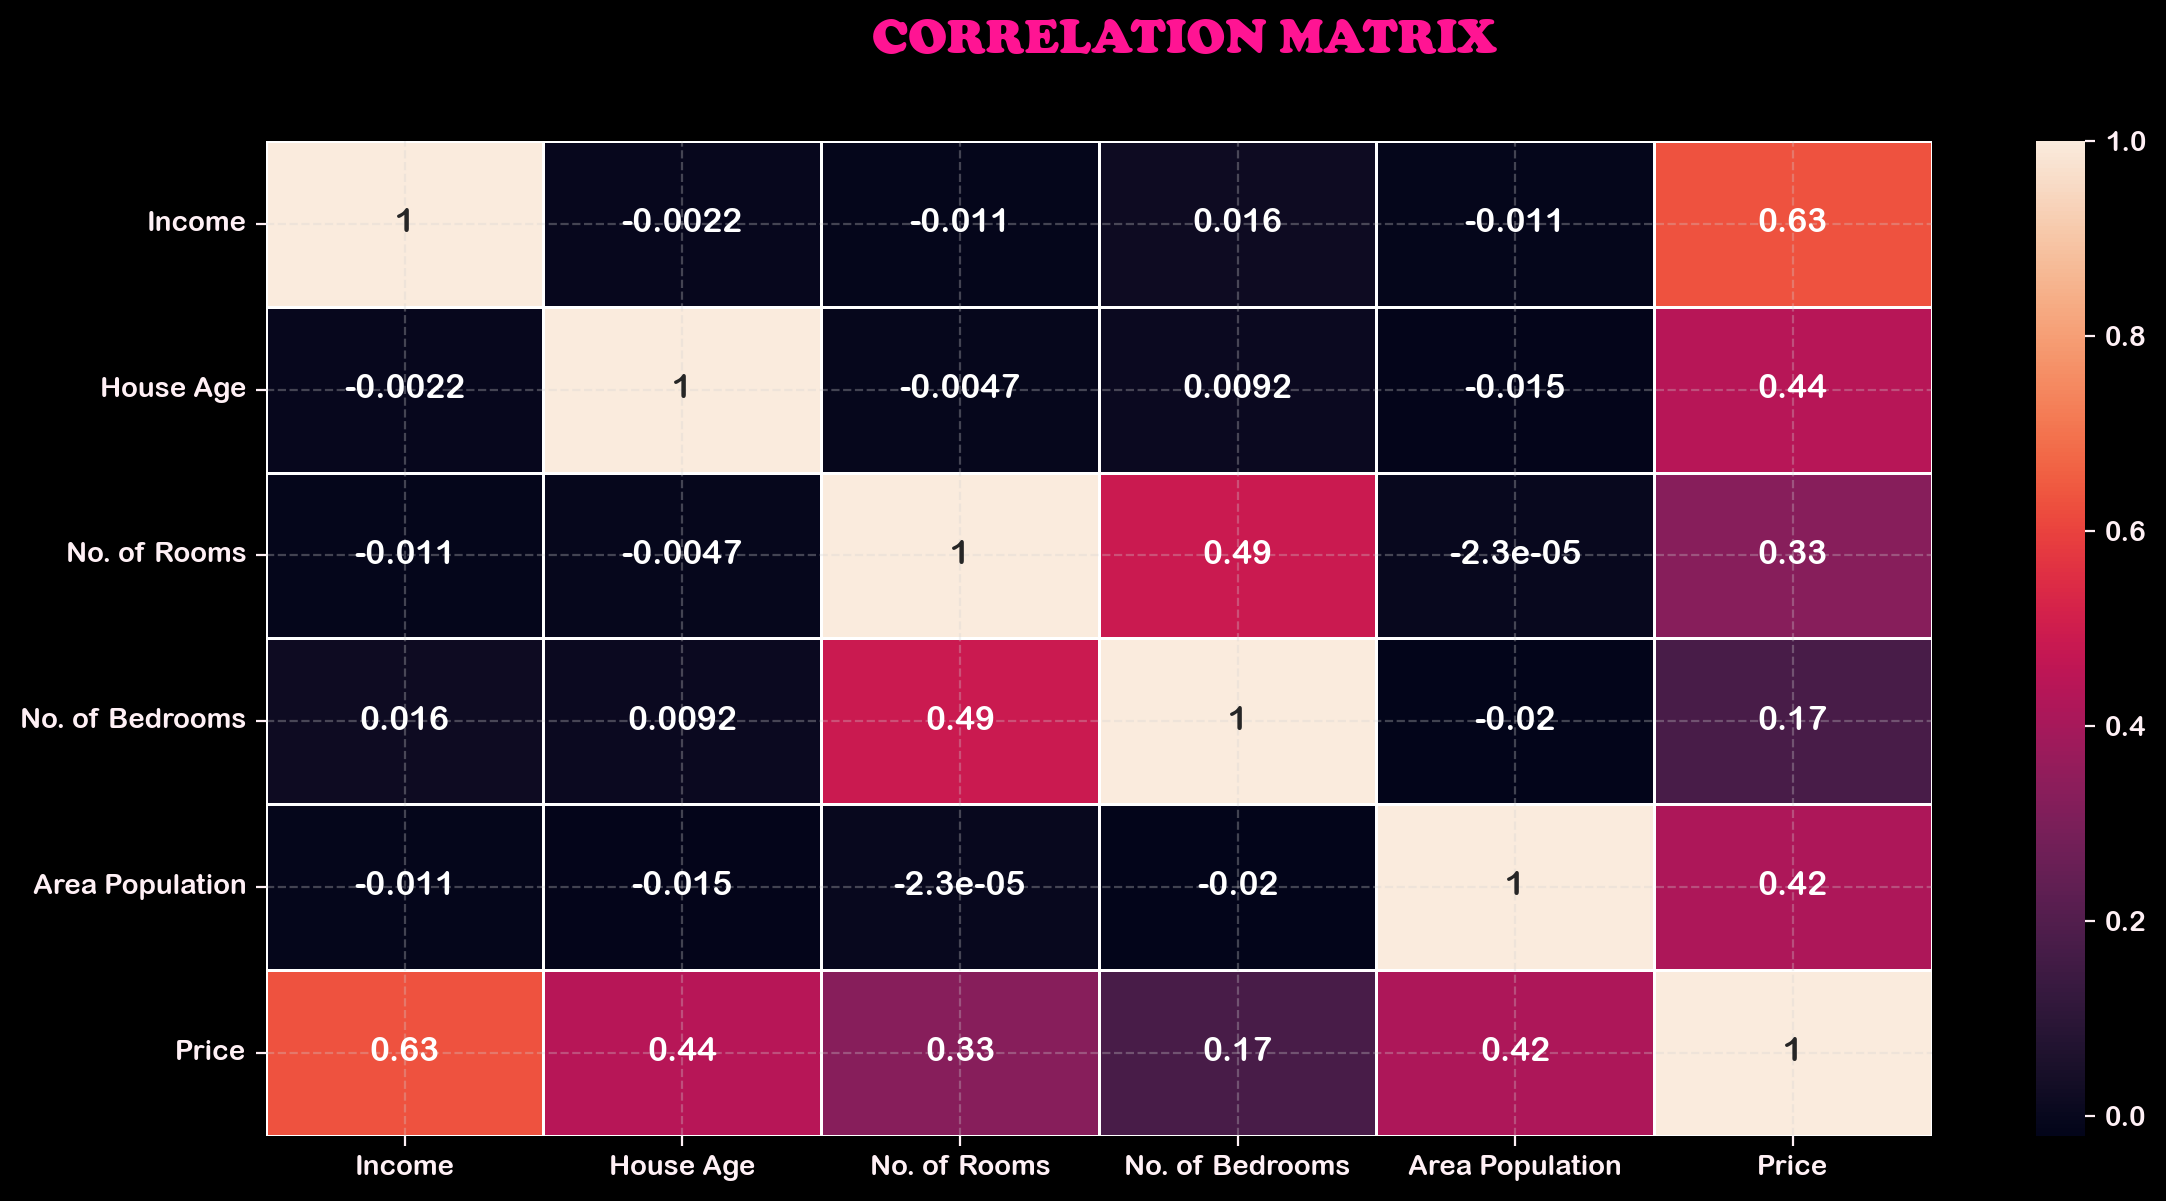

In [15]:
# Correlation matrix to check the correlation between numerical columns
plt.figure(figsize = (12, 6), layout = 'tight')
plt.suptitle('CORRELATION MATRIX', fontsize = 18, fontweight = 'bold', font = 'cooper black', color = 'deeppink',
                                        ha = 'center', va = 'center')
plt.subplot(1,1,1)
sns.heatmap(data.corr(), annot = True, linewidths = 0.5)
plt.show()

## Exploratory Data Analysis
### Income

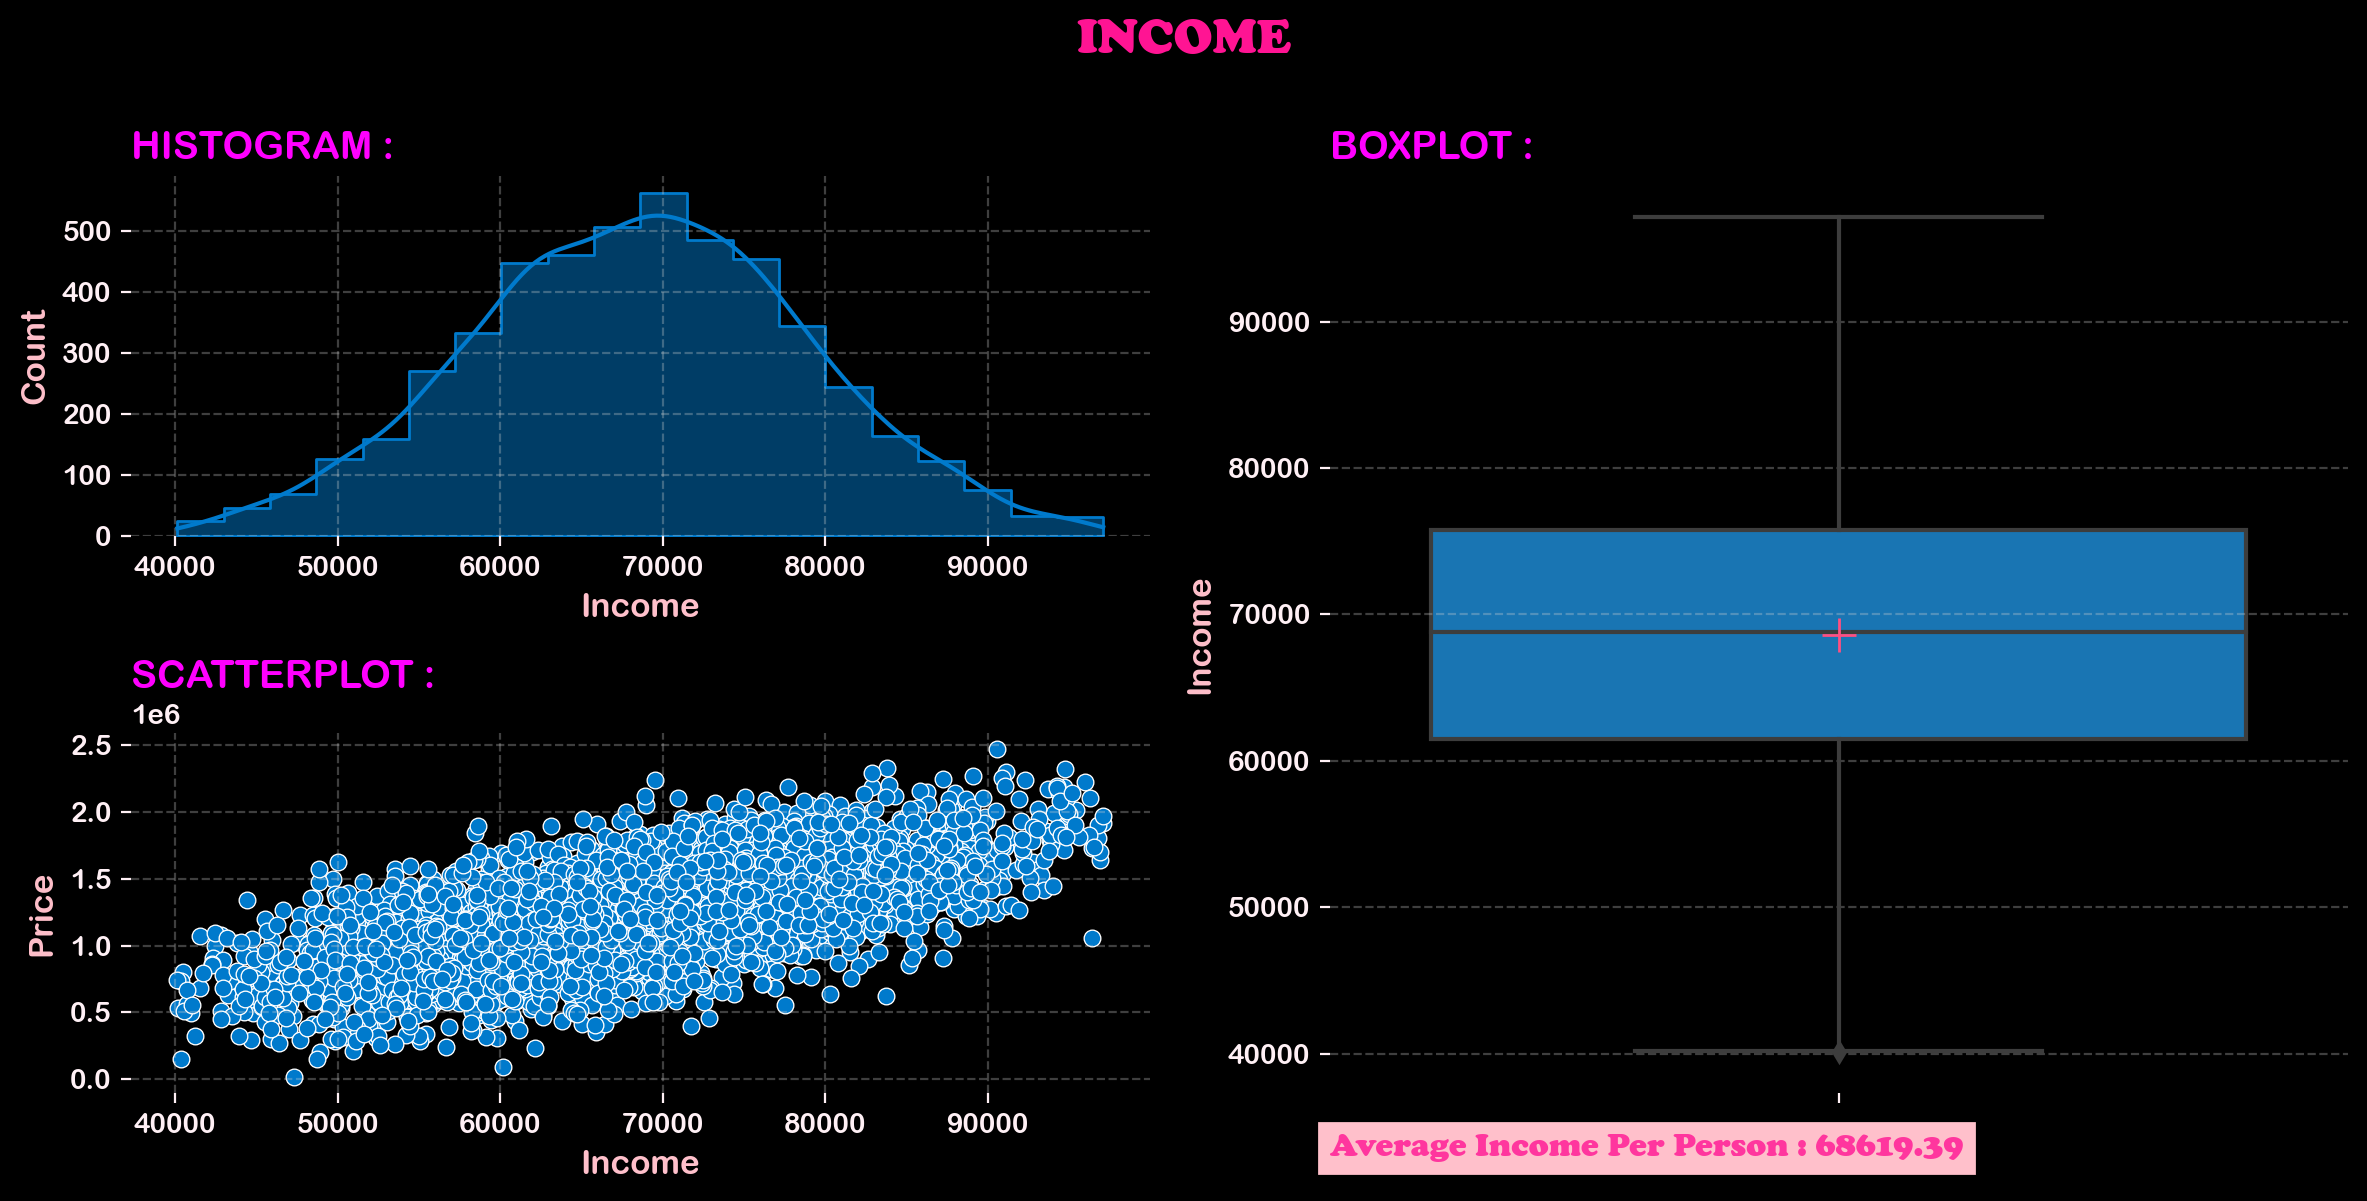

In [16]:
# Income Distribution
plt.figure(figsize = (12, 6), layout = 'tight')
plt.suptitle('INCOME', fontsize = 18, fontweight = 'bold', font = 'cooper black', color = 'deeppink',
                                        ha = 'center', va = 'center')
# Histogram
plt.subplot(2,2,1)
sns.histplot(x = 'Income',  data = data, kde = True, bins = 20, element = 'step')
plt.title('HISTOGRAM :', loc = 'left')

# Boxplot
plt.subplot(2,2,(2,4))
sns.boxplot( y = 'Income', data = data, showmeans = True, meanprops = {'color' : 'red', 'marker' : '+', 'markersize' : 12}) 
plt.xlabel(None)
plt.title('BOXPLOT :', loc = 'left')

avg_income = data['Income'].mean().round(2)
plt.text(-0.5,33000, s = f'Average Income Per Person : {avg_income}', color = 'deeppink', fontweight = 'bold', fontsize = 12,
        alpha = 0.8, backgroundcolor = 'pink', font = 'cooper black')

#Scatterplot
plt.subplot(2,2,3)
sns.scatterplot('Income', 'Price', data = data)
plt.title('SCATTERPLOT :', loc = 'left')

plt.show()

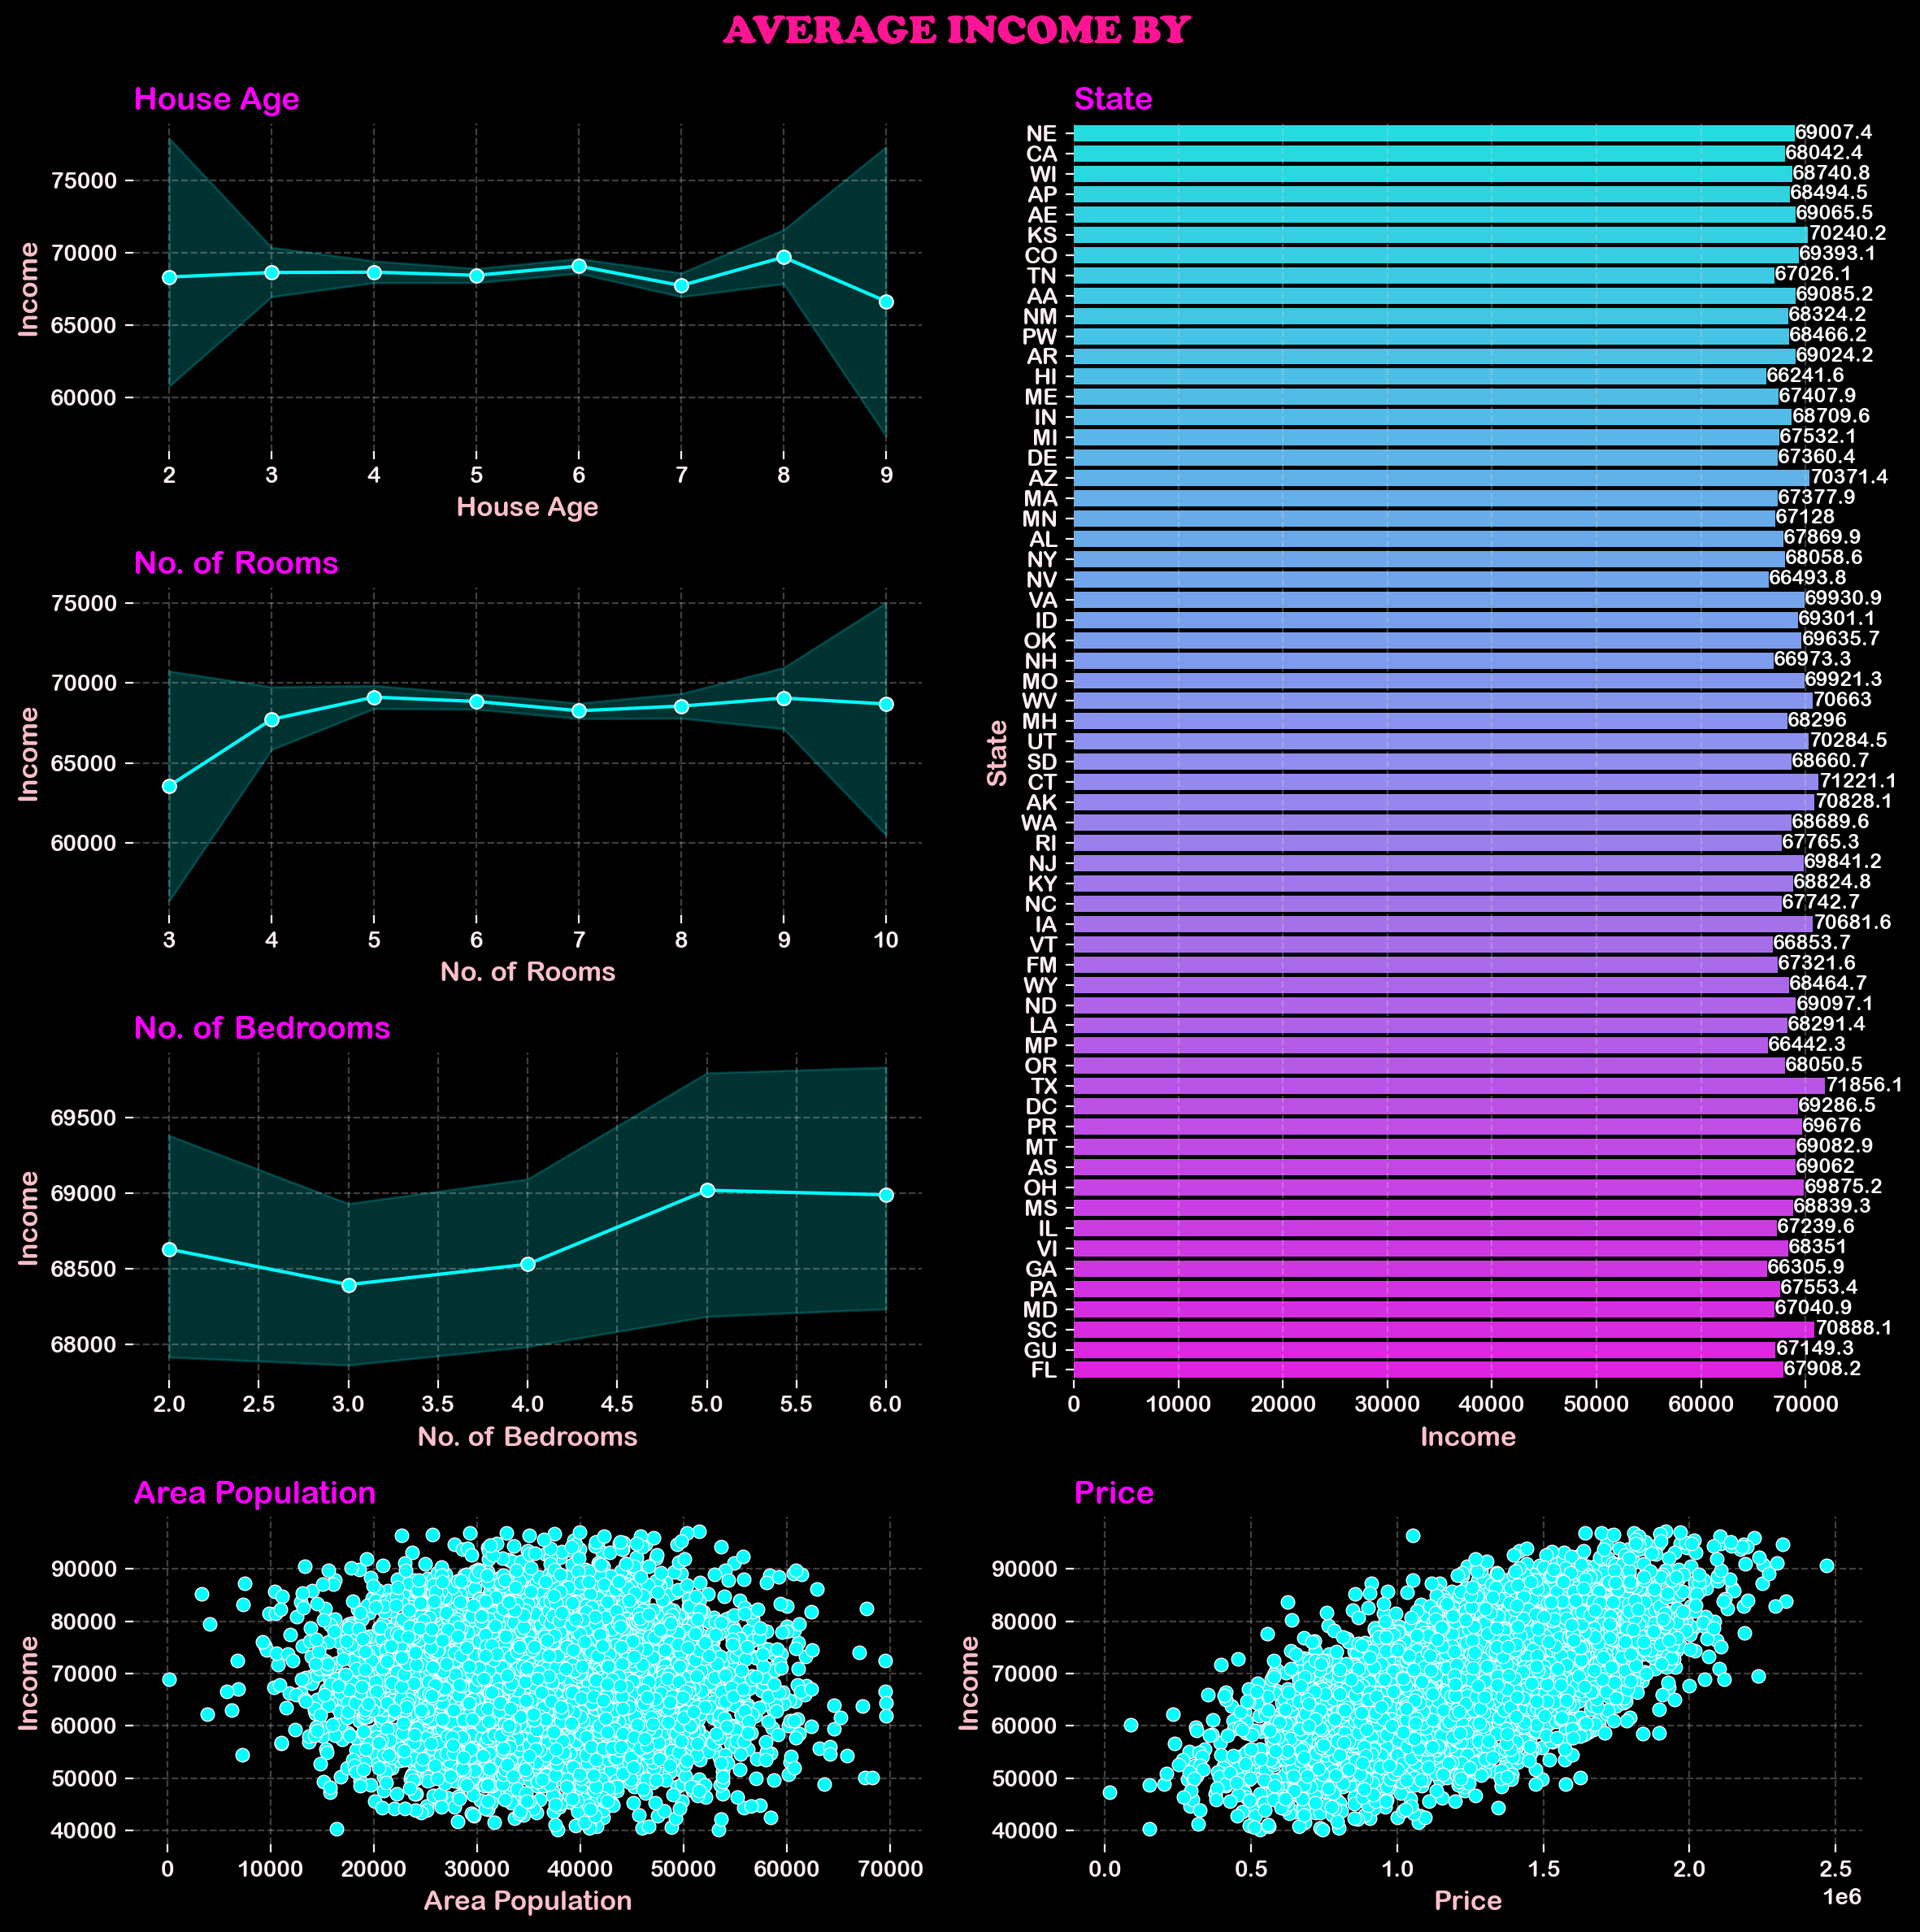

In [17]:
# Analysing Income data with other columns
plt.figure(figsize = (12, 12), layout = 'tight')
plt.suptitle('AVERAGE INCOME BY ', fontsize = 18, fontweight = 'bold', font = 'cooper black', color = 'deeppink',
                                        ha = 'center', va = 'center')

# Income by House Age
plt.subplot(4,2,1)
sns.lineplot('House Age','Income', data = data, color = 'cyan', marker = '.', markersize = 12 )
plt.title('House Age', loc = 'left')

# Income by No. of Rooms
plt.subplot(4,2,3)
sns.lineplot('No. of Rooms','Income', data = data, color = 'cyan', marker = '.', markersize = 12 )
plt.title('No. of Rooms', loc = 'left')

# Income by No. of Bedrooms
plt.subplot(4,2,5)
sns.lineplot('No. of Bedrooms','Income', data = data, color = 'cyan', marker = '.', markersize = 12 )
plt.title('No. of Bedrooms', loc = 'left')

# Income by State
plt.subplot(4,2, (2,6))
ax = sns.barplot('Income', 'State',data = data, ci = None, palette = 'cool')
for i in ax.containers:
    ax.bar_label(i, fontsize = 9, )
plt.title('State', loc = 'left')

# Income by Area Population
plt.subplot(4,2,7)
sns.scatterplot('Area Population', 'Income', data = data, color = 'cyan')
plt.title('Area Population', loc = 'left')

# Income by Price
plt.subplot(4,2,8)
sns.scatterplot('Price', 'Income', data = data, color = 'cyan')
plt.title('Price', loc = 'left')

plt.show()

### House Age

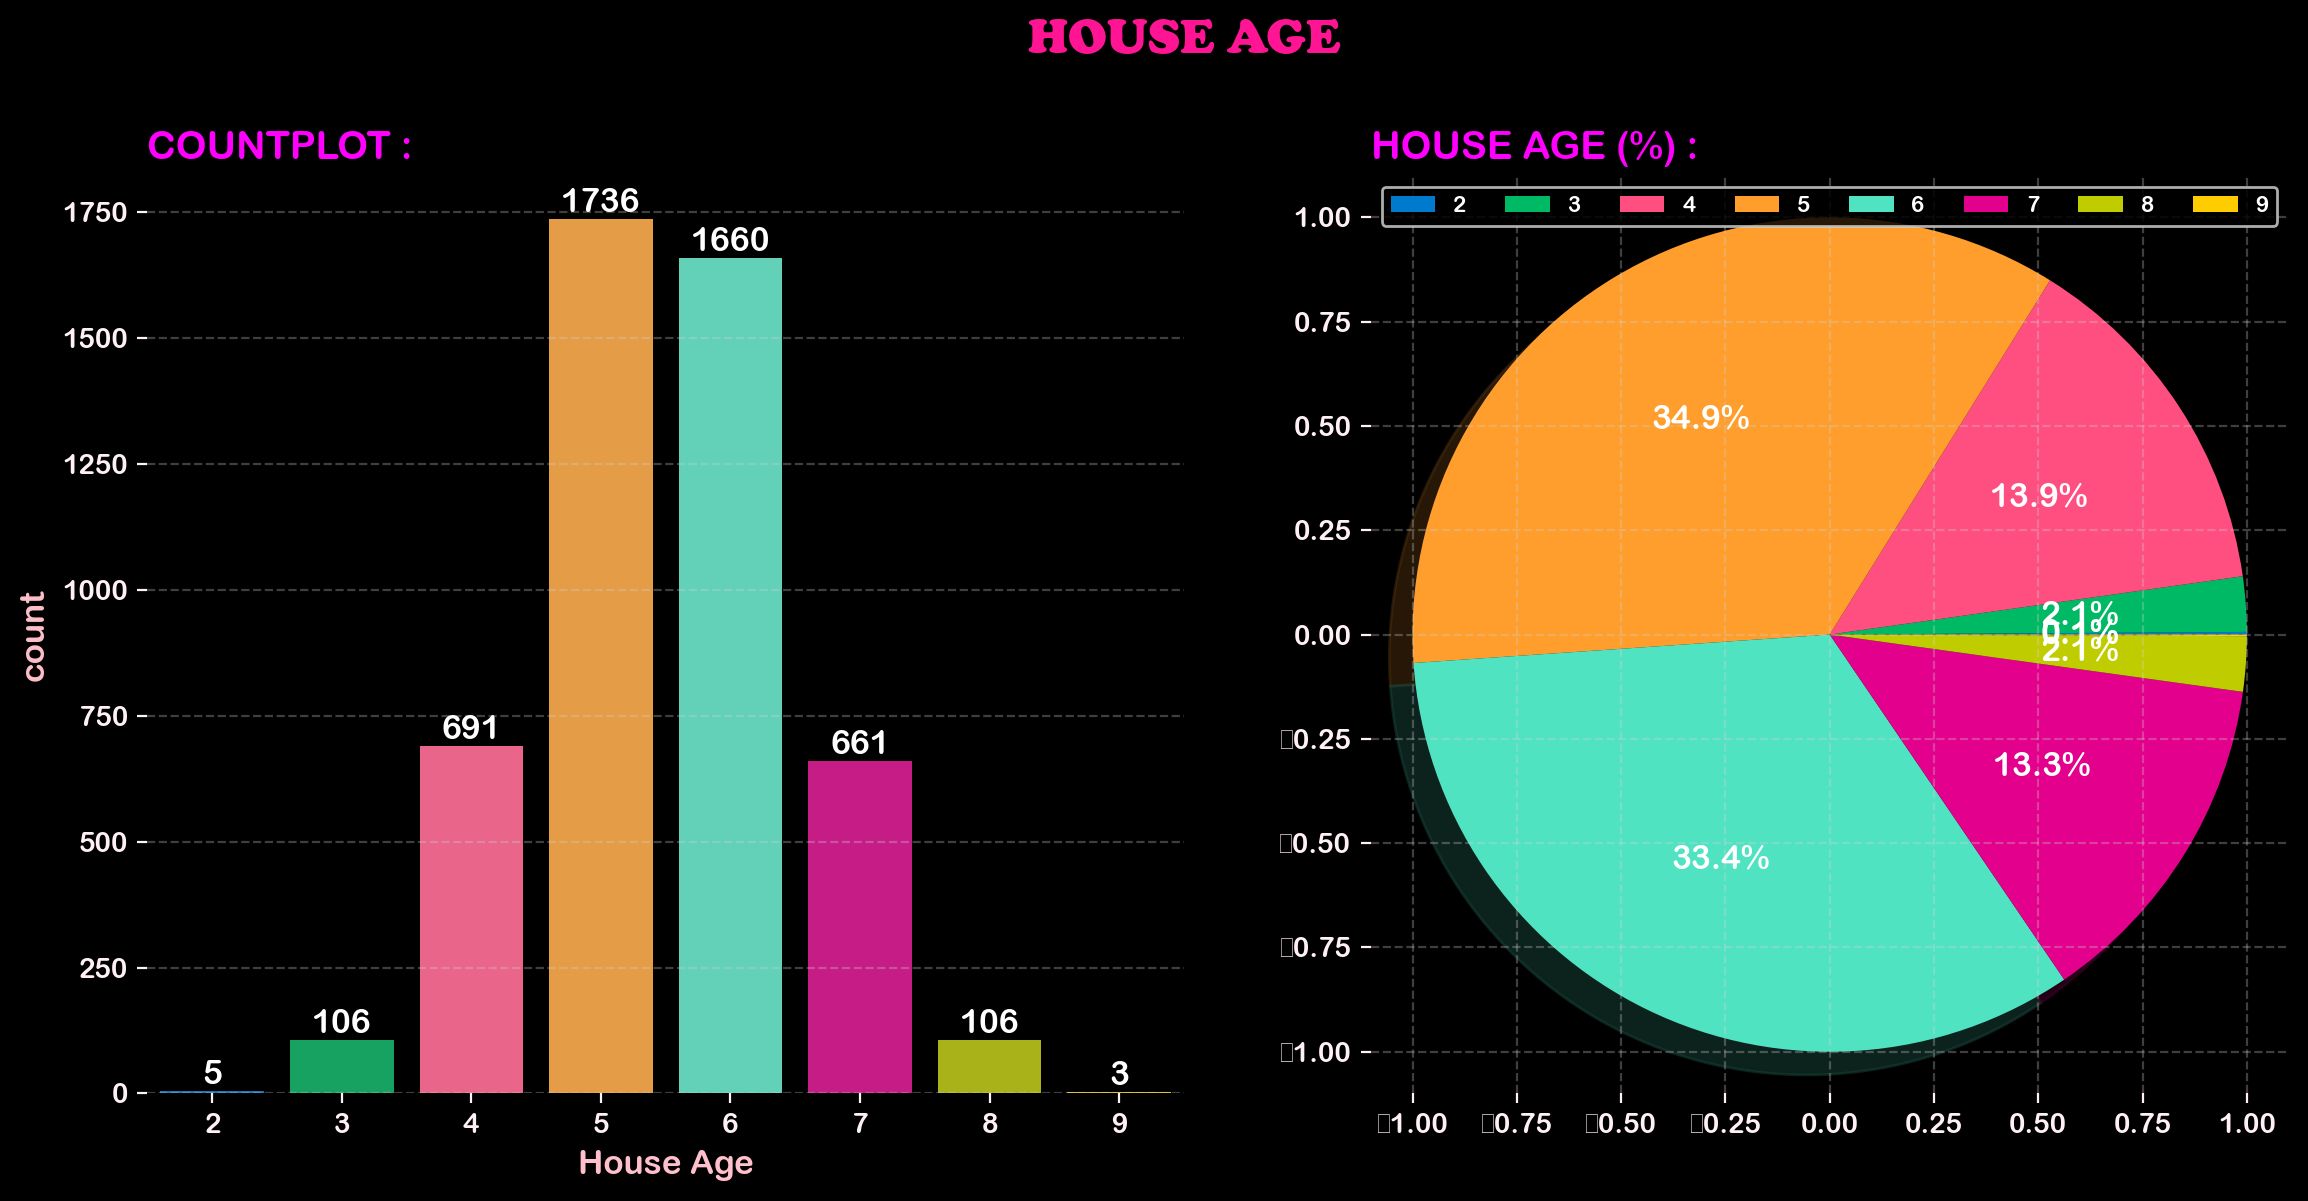

In [18]:
# House Age Distribution
plt.figure(figsize = (12, 6), layout = 'tight')
plt.suptitle('HOUSE AGE', fontsize = 18, fontweight = 'bold', font = 'cooper black', color = 'deeppink',
                                        ha = 'center', va = 'center')

# Countplot
plt.subplot(1,2,1)
ax = sns.countplot(data['House Age'],)
for i in ax.containers:
    ax.bar_label(i)
plt.title('COUNTPLOT :', loc = 'left')

# Pie Chart
plt.subplot(1,2,2)
house_age = data['House Age'].value_counts().sort_index()
labels = house_age.index
plt.pie(house_age.values,  autopct = '%1.1f%%', startangle = 0, shadow = True, frame = True)
plt.legend(labels = labels, loc = 0, mode = 'expand', ncol = 8)
plt.title('HOUSE AGE (%) :', loc = 'left')

plt.show()

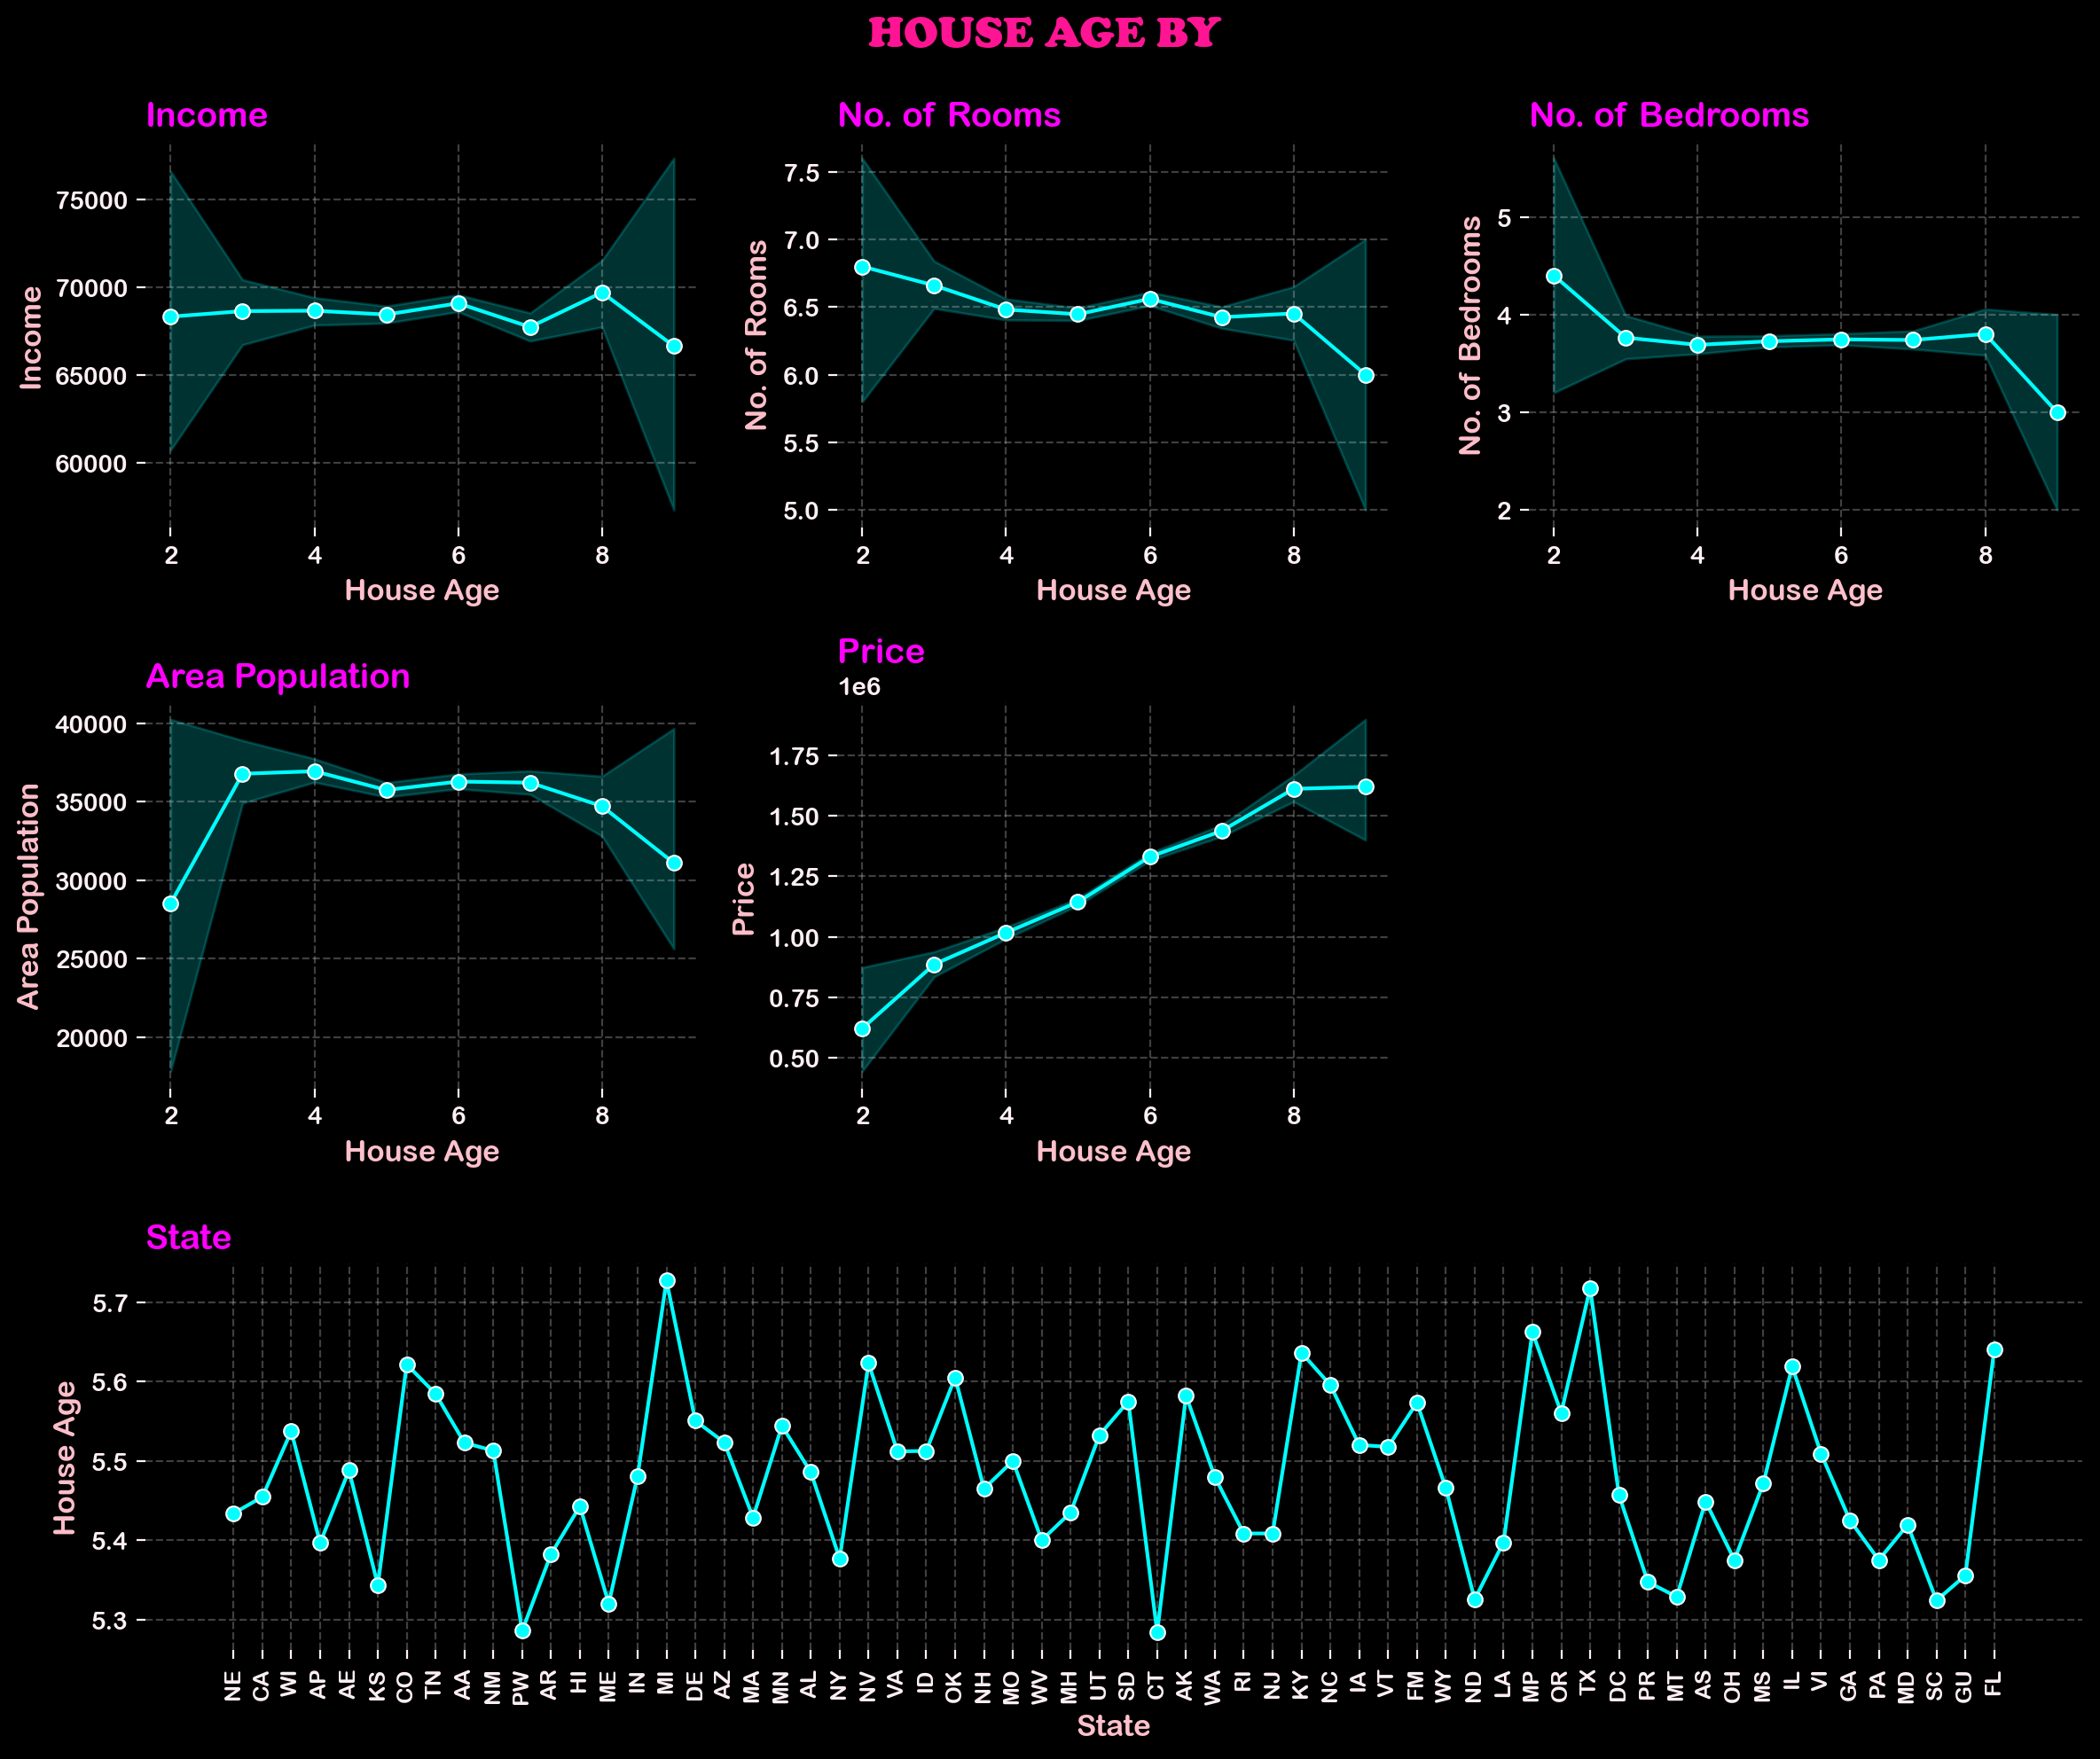

In [19]:
# Analysing House Age data with other columns
plt.figure(figsize = (12, 10), layout = 'tight')
plt.suptitle('HOUSE AGE BY ', fontsize = 18, fontweight = 'bold', font = 'cooper black', color = 'deeppink',
                                        ha = 'center', va = 'center')

cols = ['Income',  'No. of Rooms', 'No. of Bedrooms', 'Area Population',  'Price']
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.lineplot('House Age', cols[i], data = data, color = 'cyan', marker = '.', markersize = 12)
    plt.title(cols[i], loc = 'left')

plt.subplot(3,3,(7,9))
ax = sns.lineplot('State','House Age', data = data, ci = None, palette = 'cool', color = 'cyan', marker = '.', markersize = 12)
plt.xticks(fontsize = 9, rotation = 90)
plt.title('State', loc = 'left')

plt.show()

### No. of Rooms

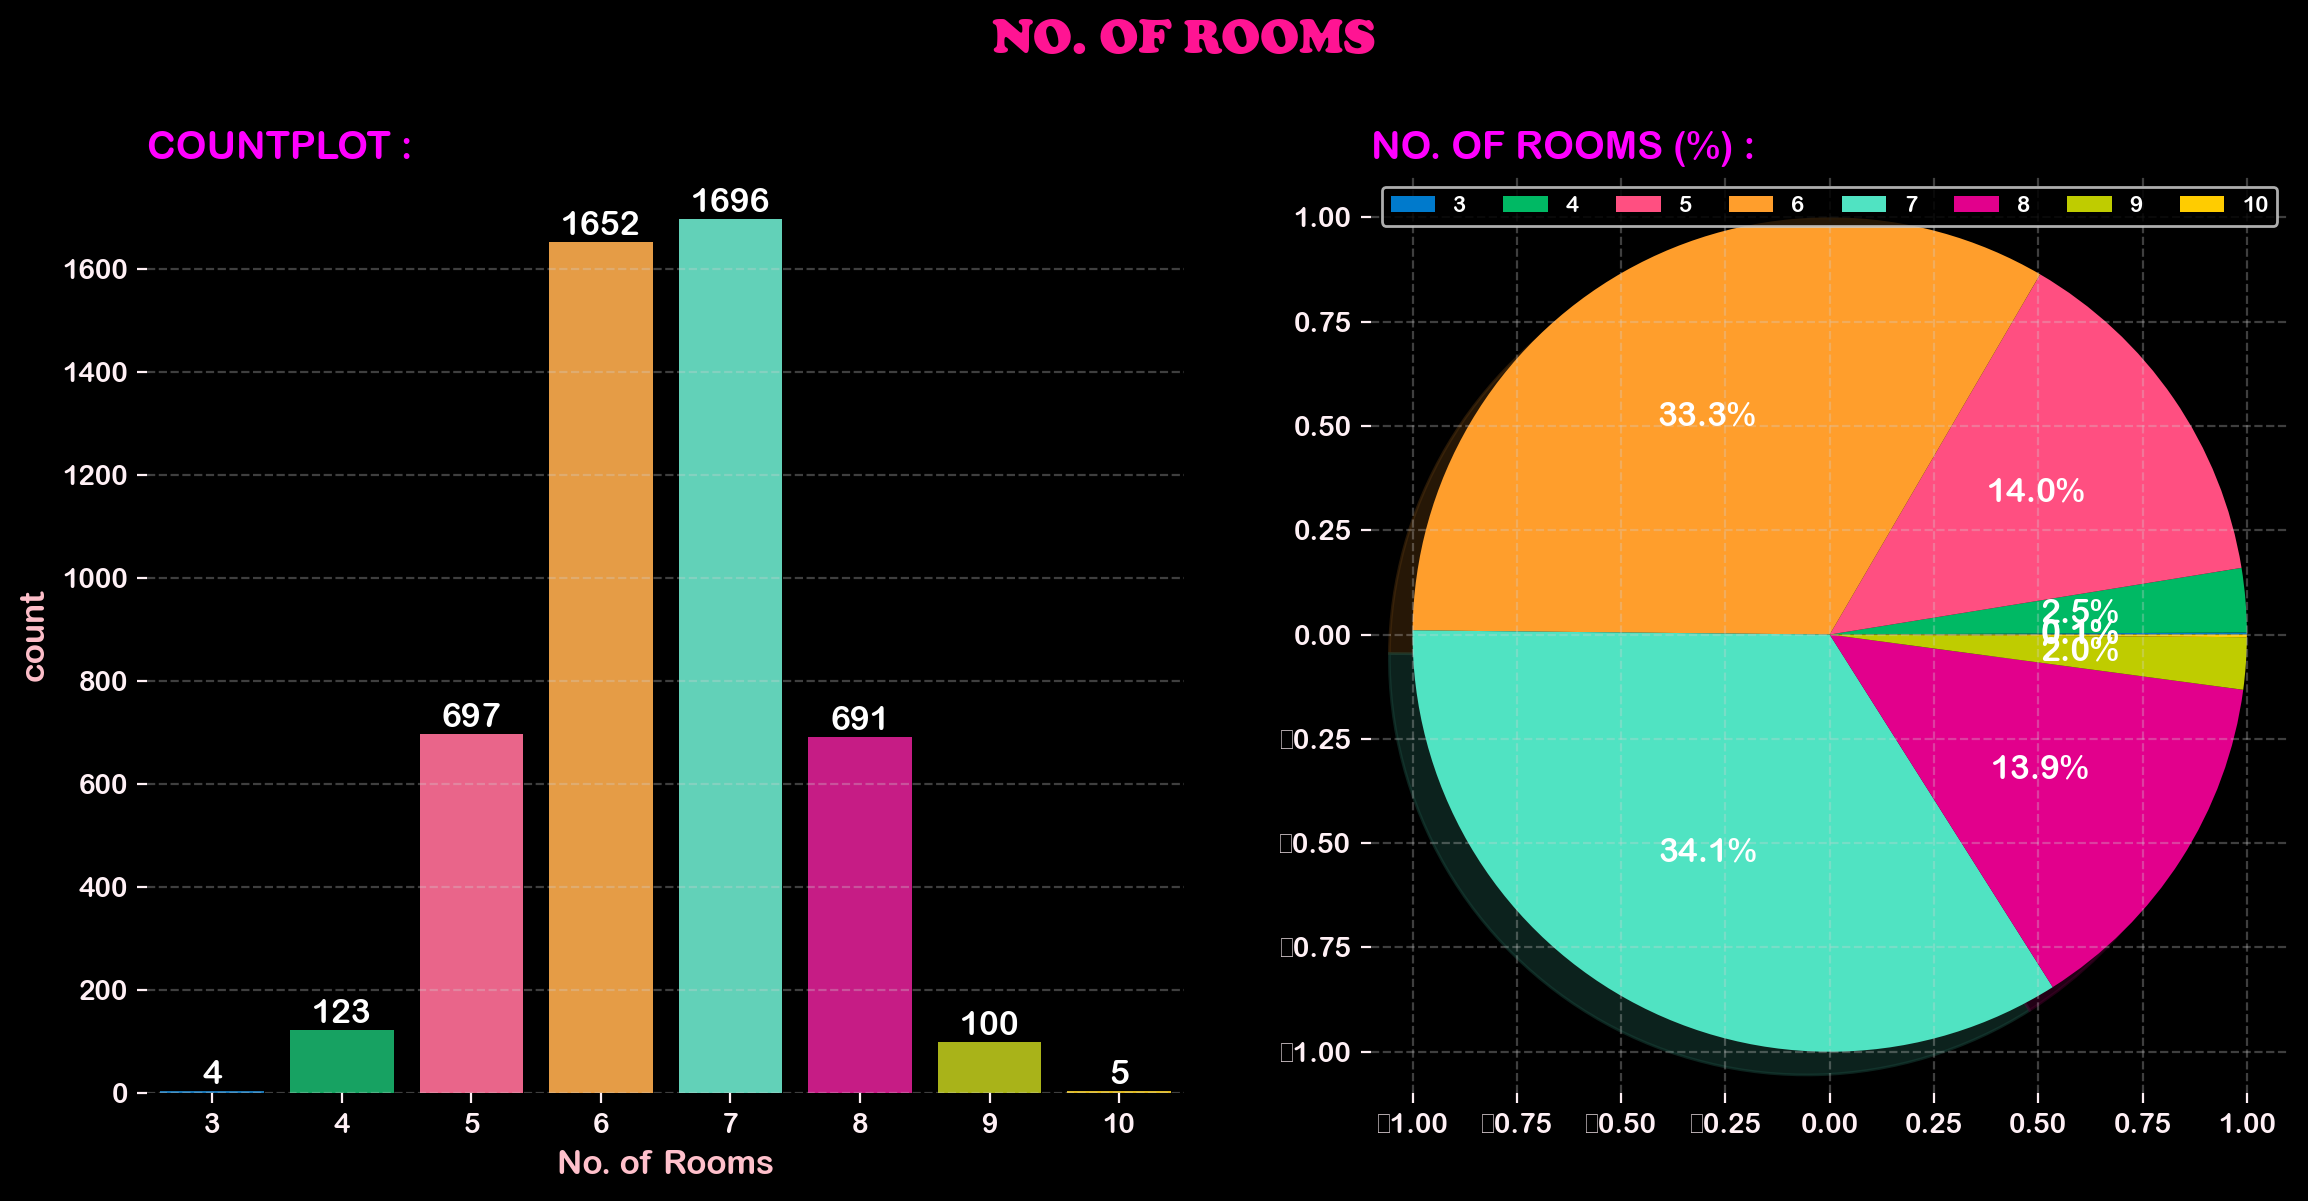

In [20]:
# No. of Rooms Distribution
plt.figure(figsize = (12, 6), layout = 'tight')
plt.suptitle('NO. OF ROOMS', fontsize = 18, fontweight = 'bold', font = 'cooper black', color = 'deeppink',
                                        ha = 'center', va = 'center')

#Countplot
plt.subplot(1,2,1)
ax = sns.countplot(data['No. of Rooms'],)
for i in ax.containers:
    ax.bar_label(i)
plt.title('COUNTPLOT :', loc = 'left')

# Pie Chart
plt.subplot(1,2,2)
house_age = data['No. of Rooms'].value_counts().sort_index()
labels = house_age.index
plt.pie(house_age.values,  autopct = '%1.1f%%', startangle = 0, shadow = True, frame = True)
plt.legend(labels = labels, loc = 0, mode = 'expand', ncol = 8)
plt.title('NO. OF ROOMS (%) :', loc = 'left')

plt.show()

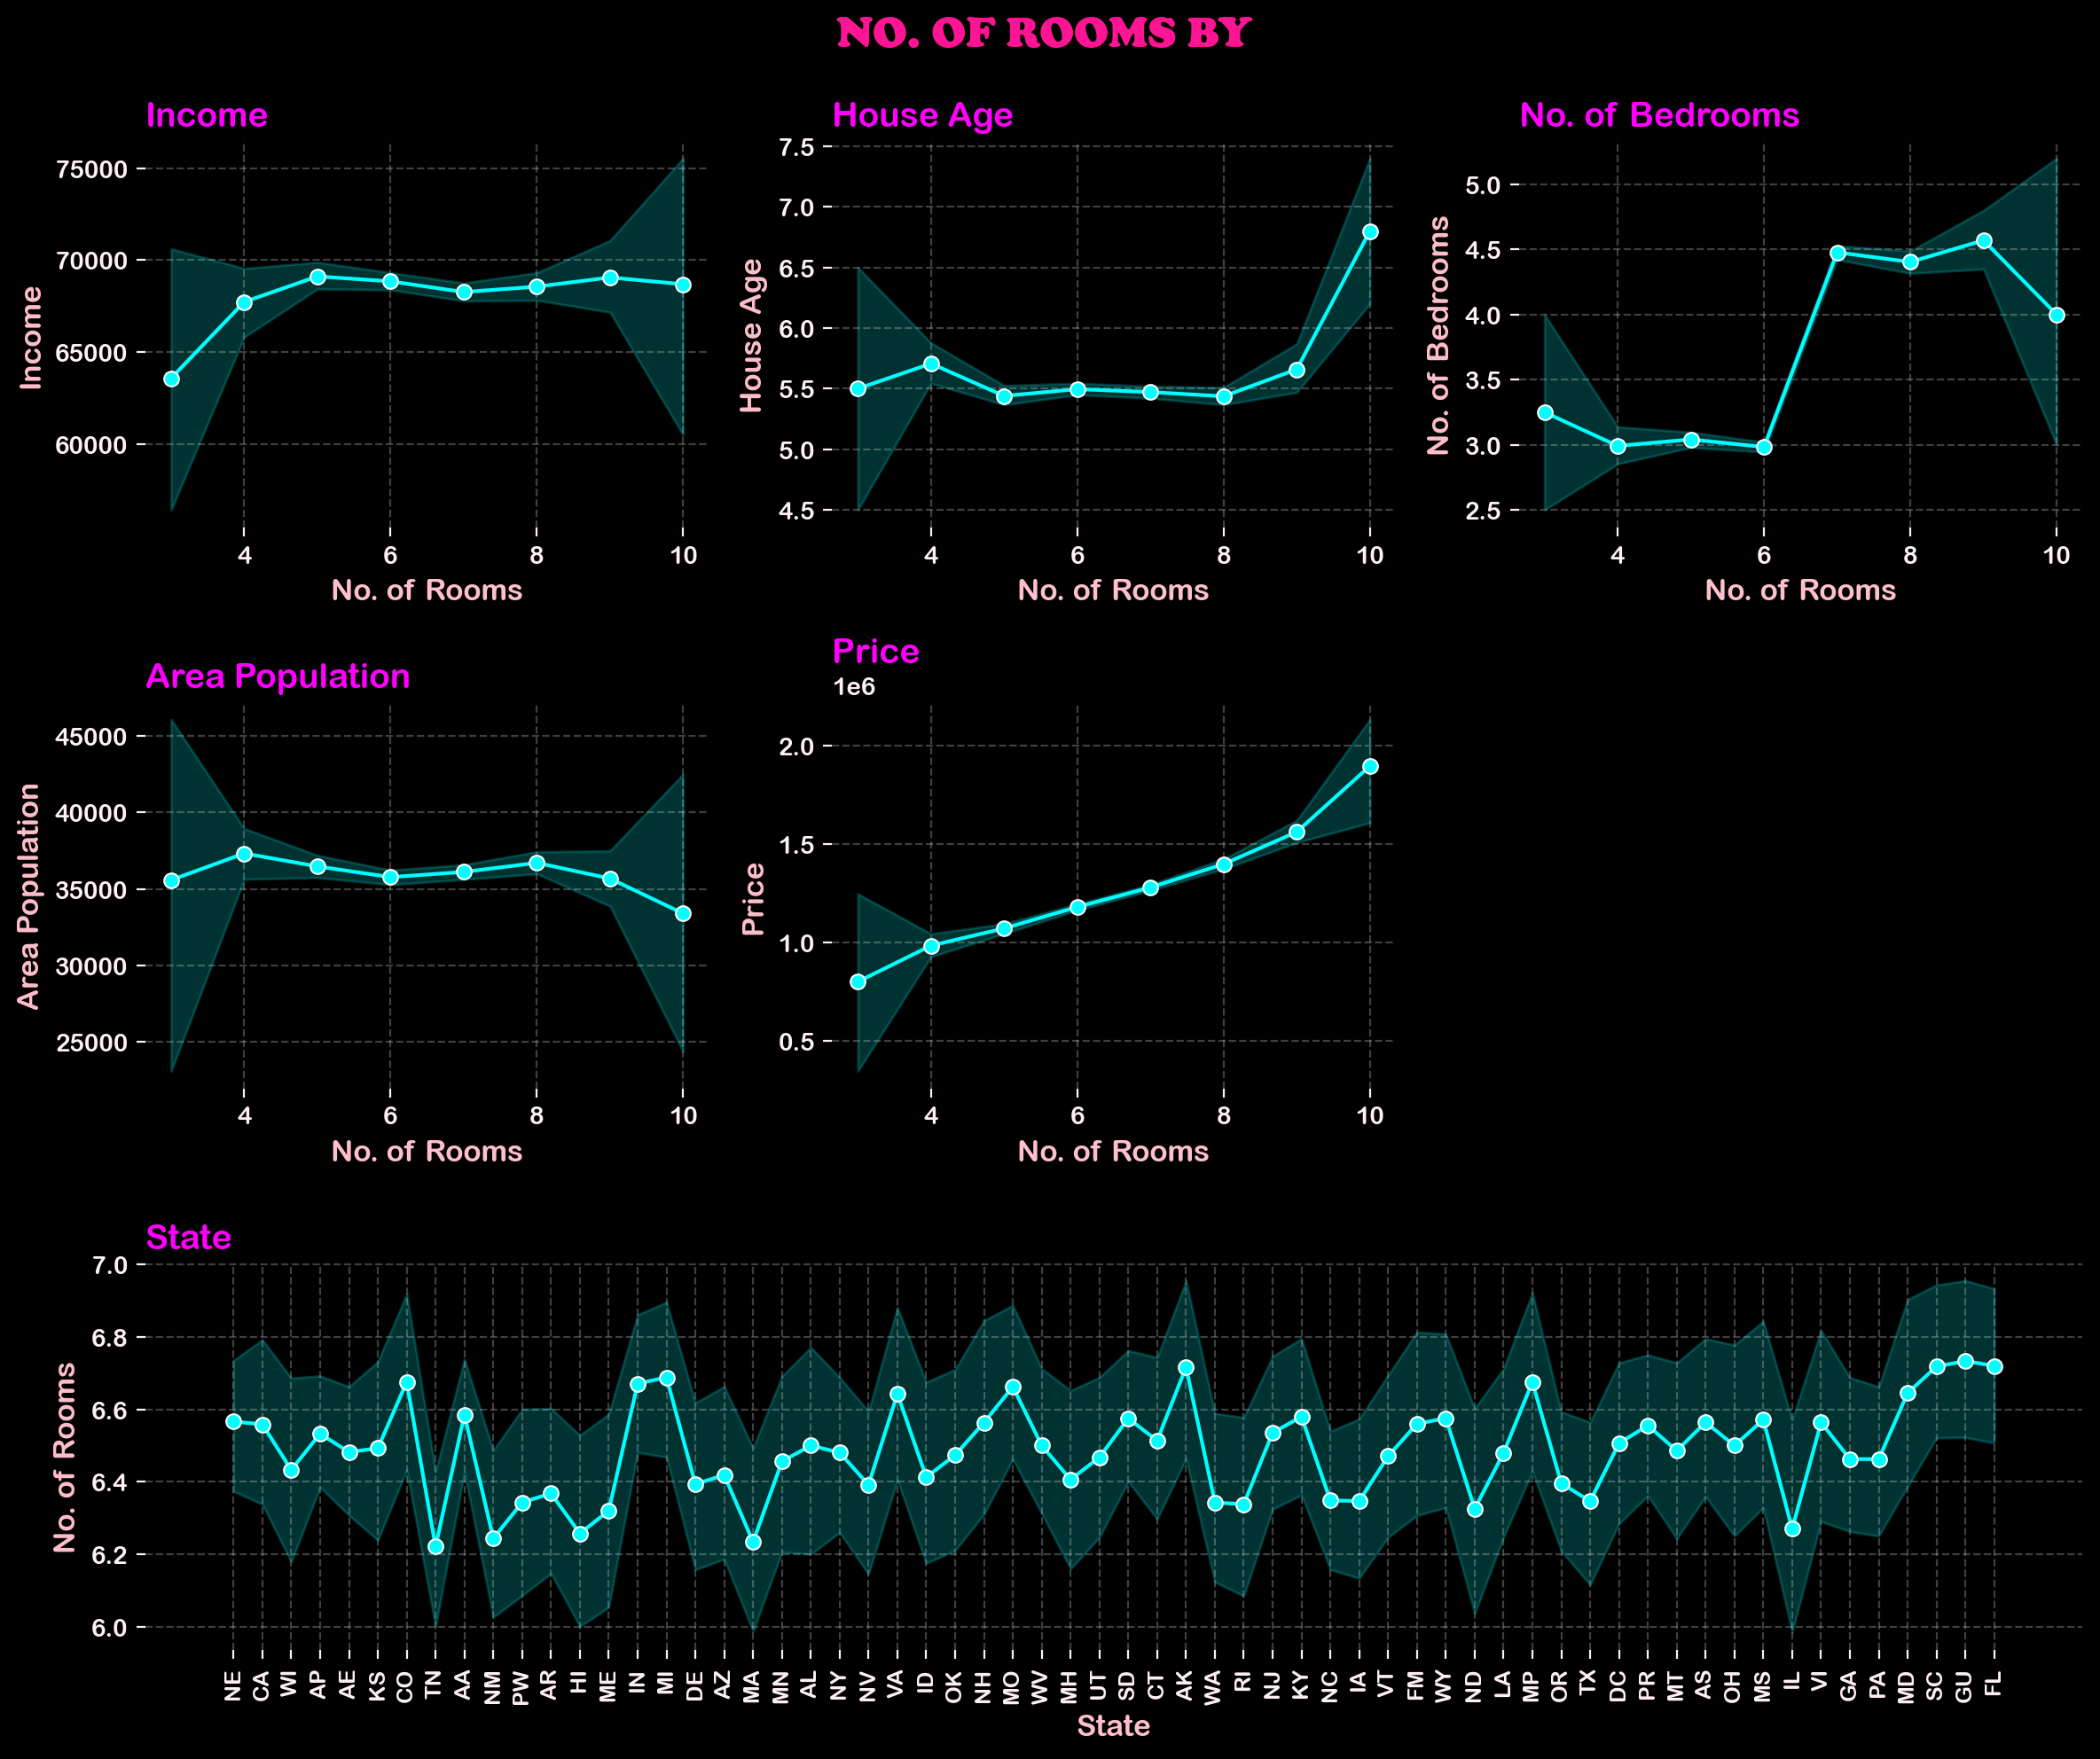

In [21]:
# Analysing No. of Rooms data with other columns
plt.figure(figsize = (12, 10), layout = 'tight')
plt.suptitle('NO. OF ROOMS BY ', fontsize = 18, fontweight = 'bold', font = 'cooper black', color = 'deeppink',
                                        ha = 'center', va = 'center')

cols = ['Income', 'House Age', 'No. of Bedrooms', 'Area Population', 'Price']
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.lineplot('No. of Rooms', cols[i], data = data, color = 'cyan', marker = '.', markersize = 12)
    plt.title(cols[i], loc = 'left')

plt.subplot(3,3,(7,9))
ax = sns.lineplot('State','No. of Rooms', data = data, color = 'cyan',  marker = '.', markersize = 12)
for i in ax.containers:
    ax.bar_label(i, fontsize = 9, rotation = 90)
plt.xticks(fontsize = 9, rotation = 90)
plt.title('State', loc = 'left')

plt.show()

### No. of Bedrooms

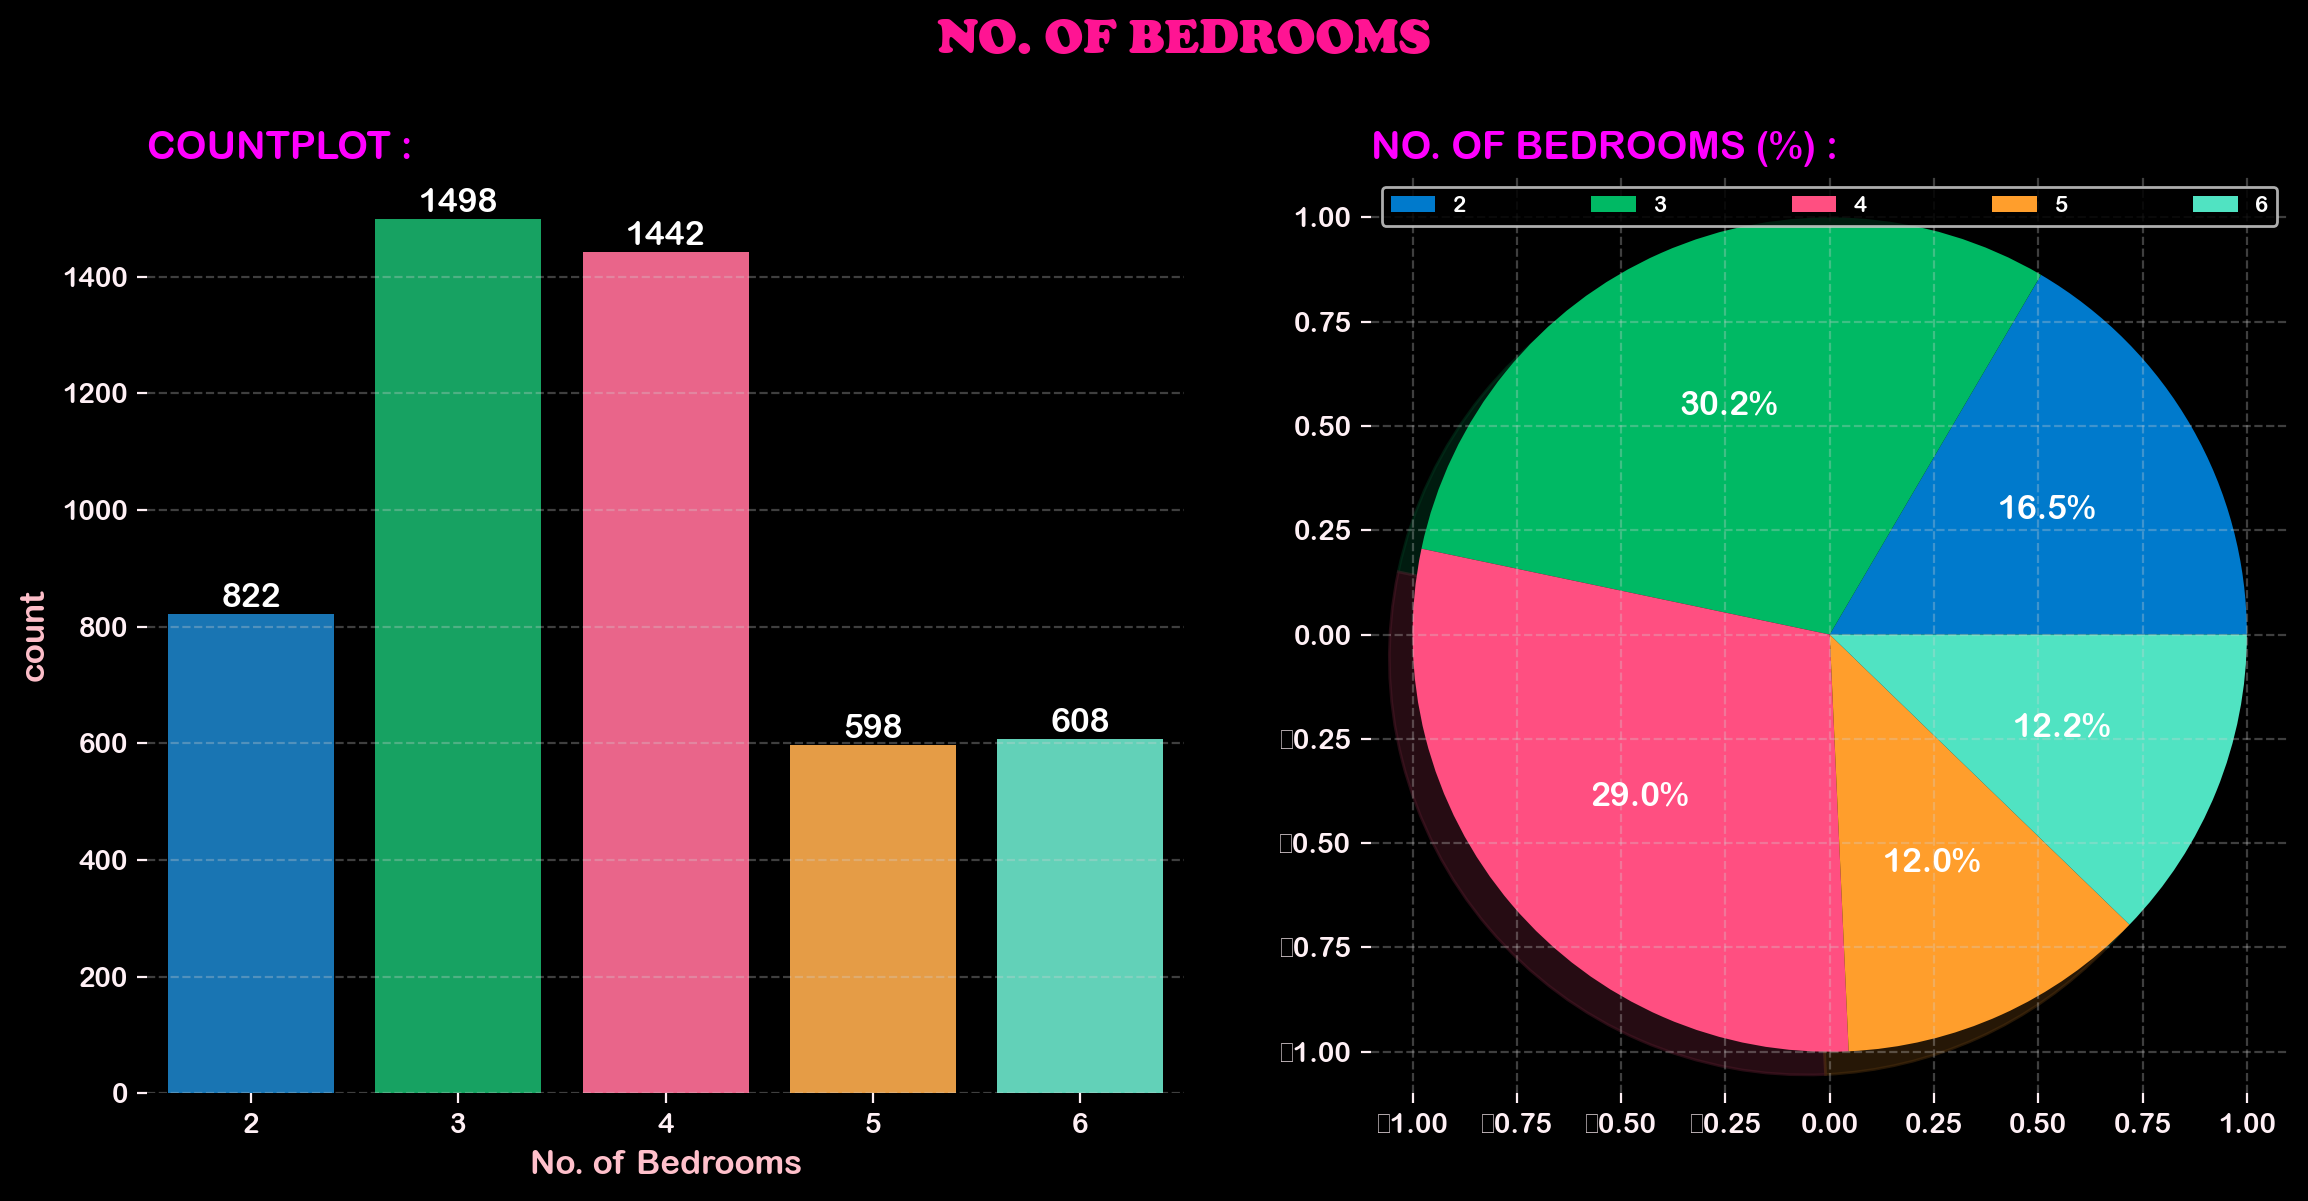

In [22]:
# Distribution of No. of Bedrooms
plt.figure(figsize = (12, 6), layout = 'tight')
plt.suptitle('NO. OF BEDROOMS', fontsize = 18, fontweight = 'bold', font = 'cooper black', color = 'deeppink',
                                        ha = 'center', va = 'center')

#Countplot
plt.subplot(1,2,1)
ax = sns.countplot(data['No. of Bedrooms'],)
for i in ax.containers:
    ax.bar_label(i)
plt.title('COUNTPLOT :', loc = 'left')

#Pie Chart
plt.subplot(1,2,2)
house_age = data['No. of Bedrooms'].value_counts().sort_index()
labels = house_age.index
plt.pie(house_age.values,  autopct = '%1.1f%%', startangle = 0, shadow = True, frame = True)
plt.legend(labels = labels, loc = 0, mode = 'expand', ncol = 8)
plt.title('NO. OF BEDROOMS (%) :', loc = 'left')

plt.show()

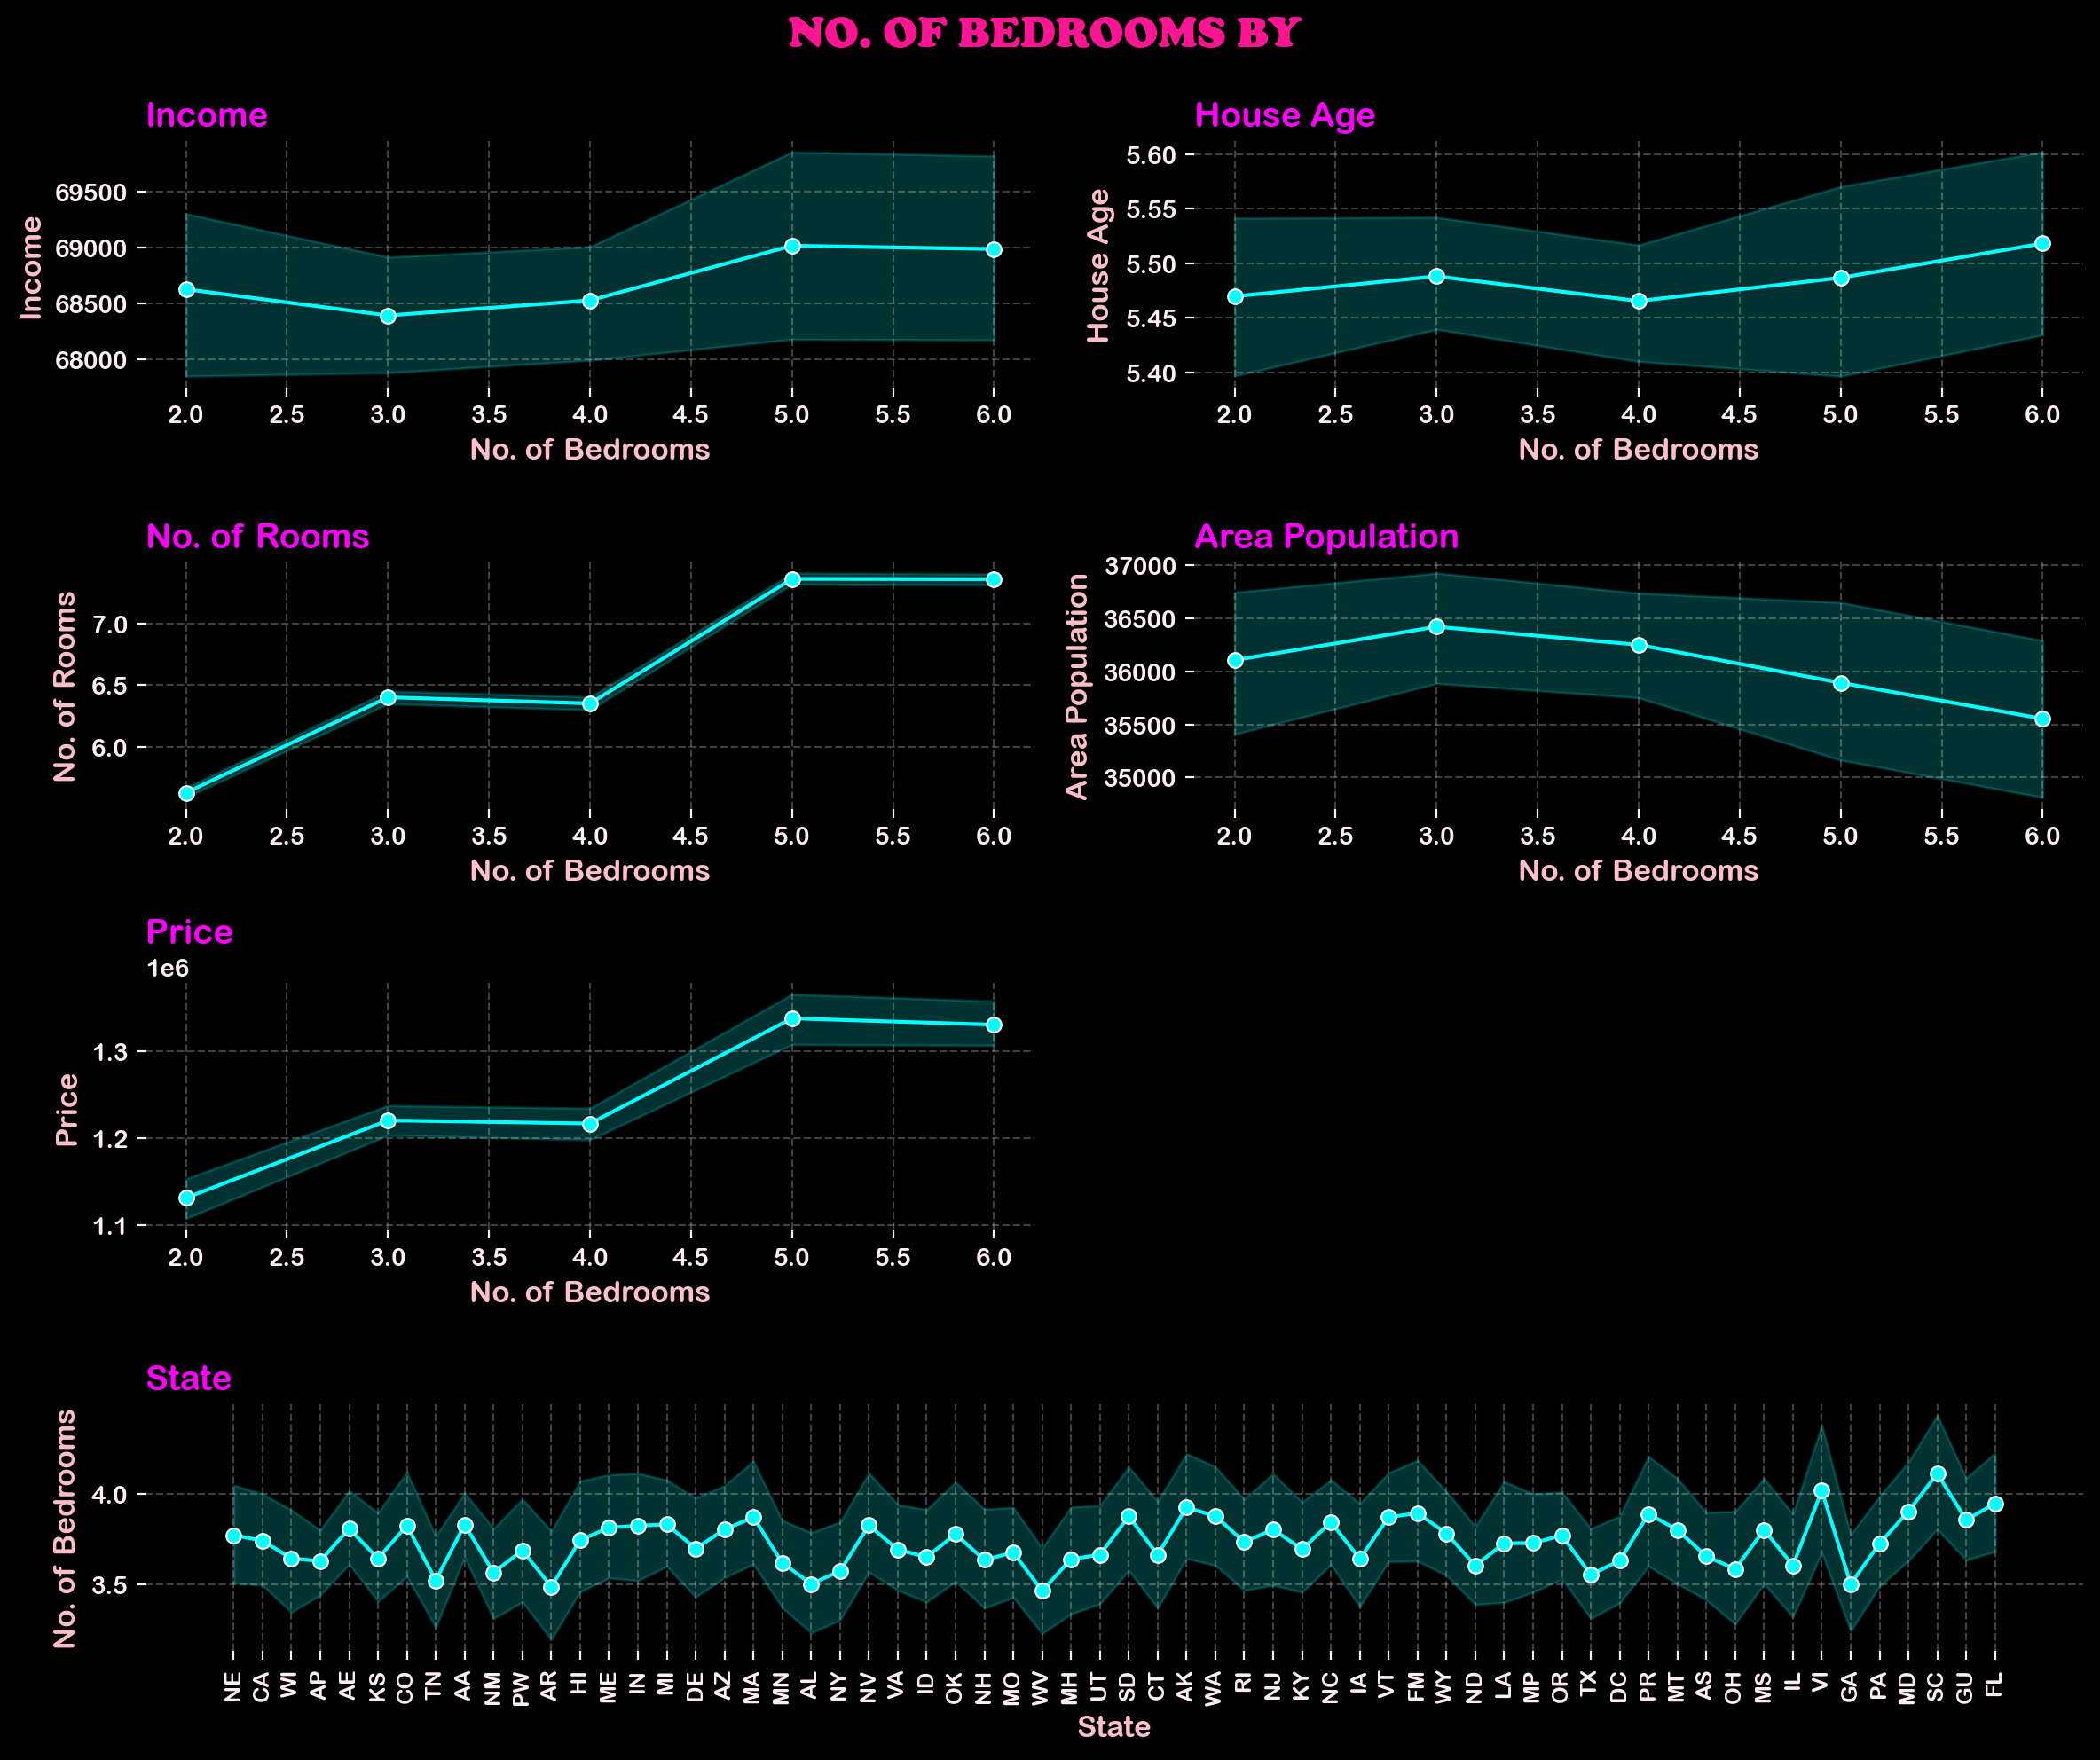

In [23]:
# Analysing No. of Bedrooms data with other columns

plt.figure(figsize = (12, 10), layout = 'tight')
plt.suptitle('NO. OF BEDROOMS BY ', fontsize = 18, fontweight = 'bold', font = 'cooper black', color = 'deeppink',
                                        ha = 'center', va = 'center')

cols = ['Income', 'House Age', 'No. of Rooms','Area Population', 'Price']
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    sns.lineplot('No. of Bedrooms', cols[i], data = data, color = 'cyan', marker = '.', markersize = 12)
    plt.title(cols[i], loc = 'left')

plt.subplot(4,2,(7,8))
ax = sns.lineplot('State','No. of Bedrooms', data = data, color = 'cyan', marker = '.', markersize = 12)
plt.xticks(fontsize = 9, rotation = 90)
plt.title('State', loc = 'left')
plt.show()

### Area Population

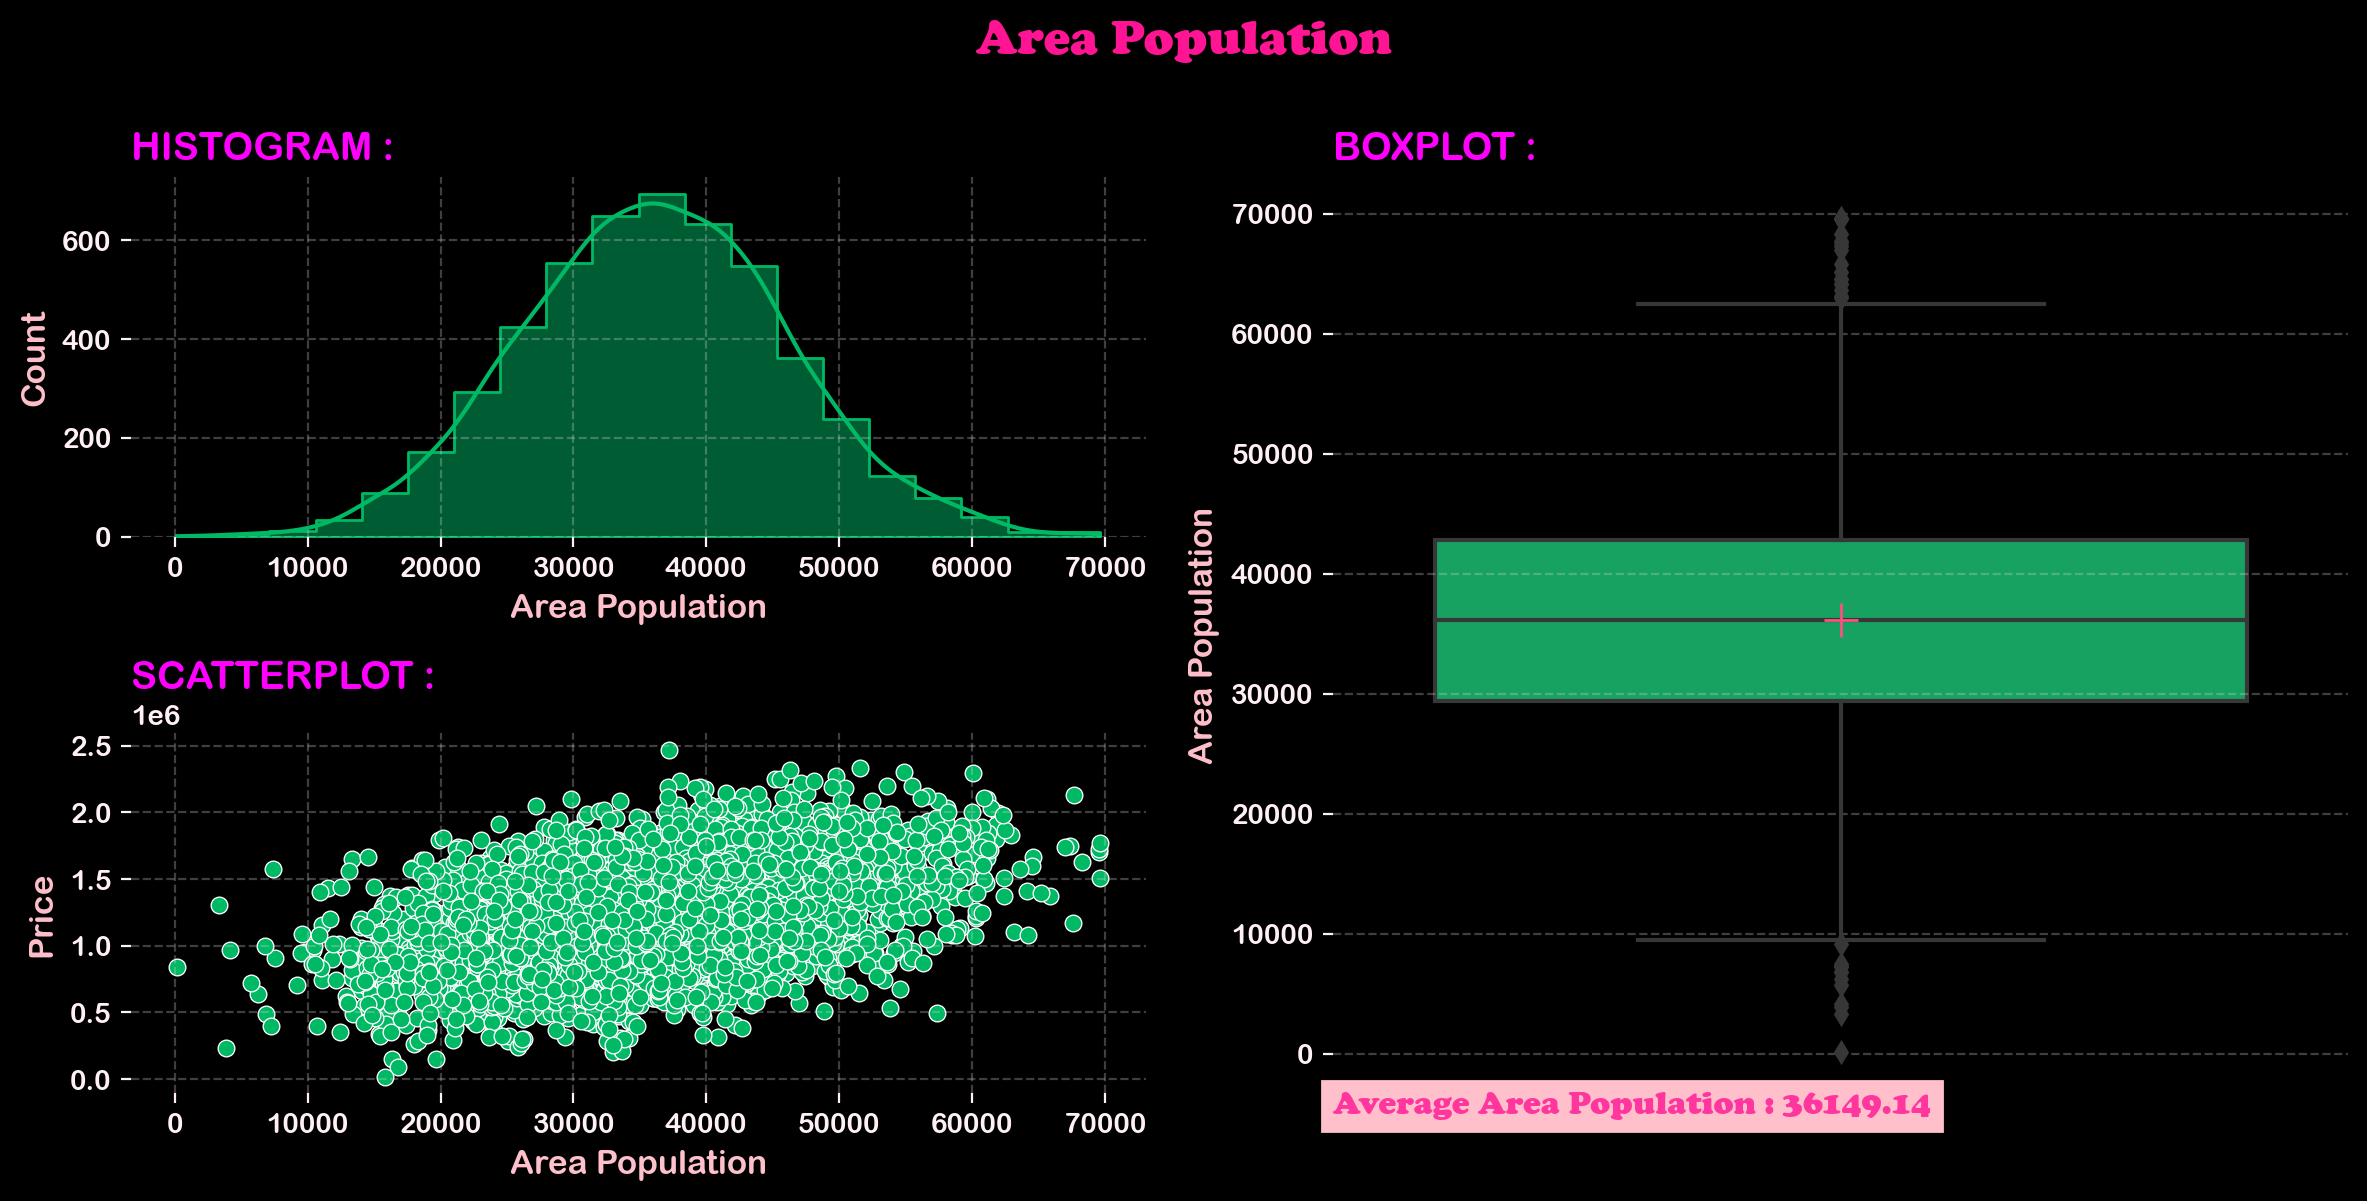

In [24]:
# Area Population Distribution
plt.figure(figsize = (12, 6), layout = 'tight')
plt.suptitle('Area Population', fontsize = 18, fontweight = 'bold', font = 'cooper black', color = 'deeppink',
                                        ha = 'center', va = 'center')

# Histogram
plt.subplot(2,2,1)
sns.histplot(x = 'Area Population',  data = data, kde = True, bins = 20, element = 'step', color = color_cycle[1])
plt.title('HISTOGRAM :', loc = 'left')

# Boxplot
plt.subplot(2,2,(2,4))
sns.boxplot( y = 'Area Population', data = data, color = color_cycle[1], 
            showmeans = True, meanprops = {'color' : 'red', 'marker' : '+', 'markersize' : 12}) 
plt.xlabel(None)
plt.title('BOXPLOT :', loc = 'left')

avg_area_population = data['Area Population'].mean().round(2)
plt.text(-0.5, -5000, s = f'Average Area Population : {avg_area_population}', color = 'deeppink',
         fontweight = 'bold', fontsize = 12, alpha = 0.8, backgroundcolor = 'pink', font = 'cooper black')

# Scattterplot
plt.subplot(2,2,3)
sns.scatterplot('Area Population', 'Price', data = data, color = color_cycle[1])
plt.title('SCATTERPLOT :', loc = 'left')

plt.show()

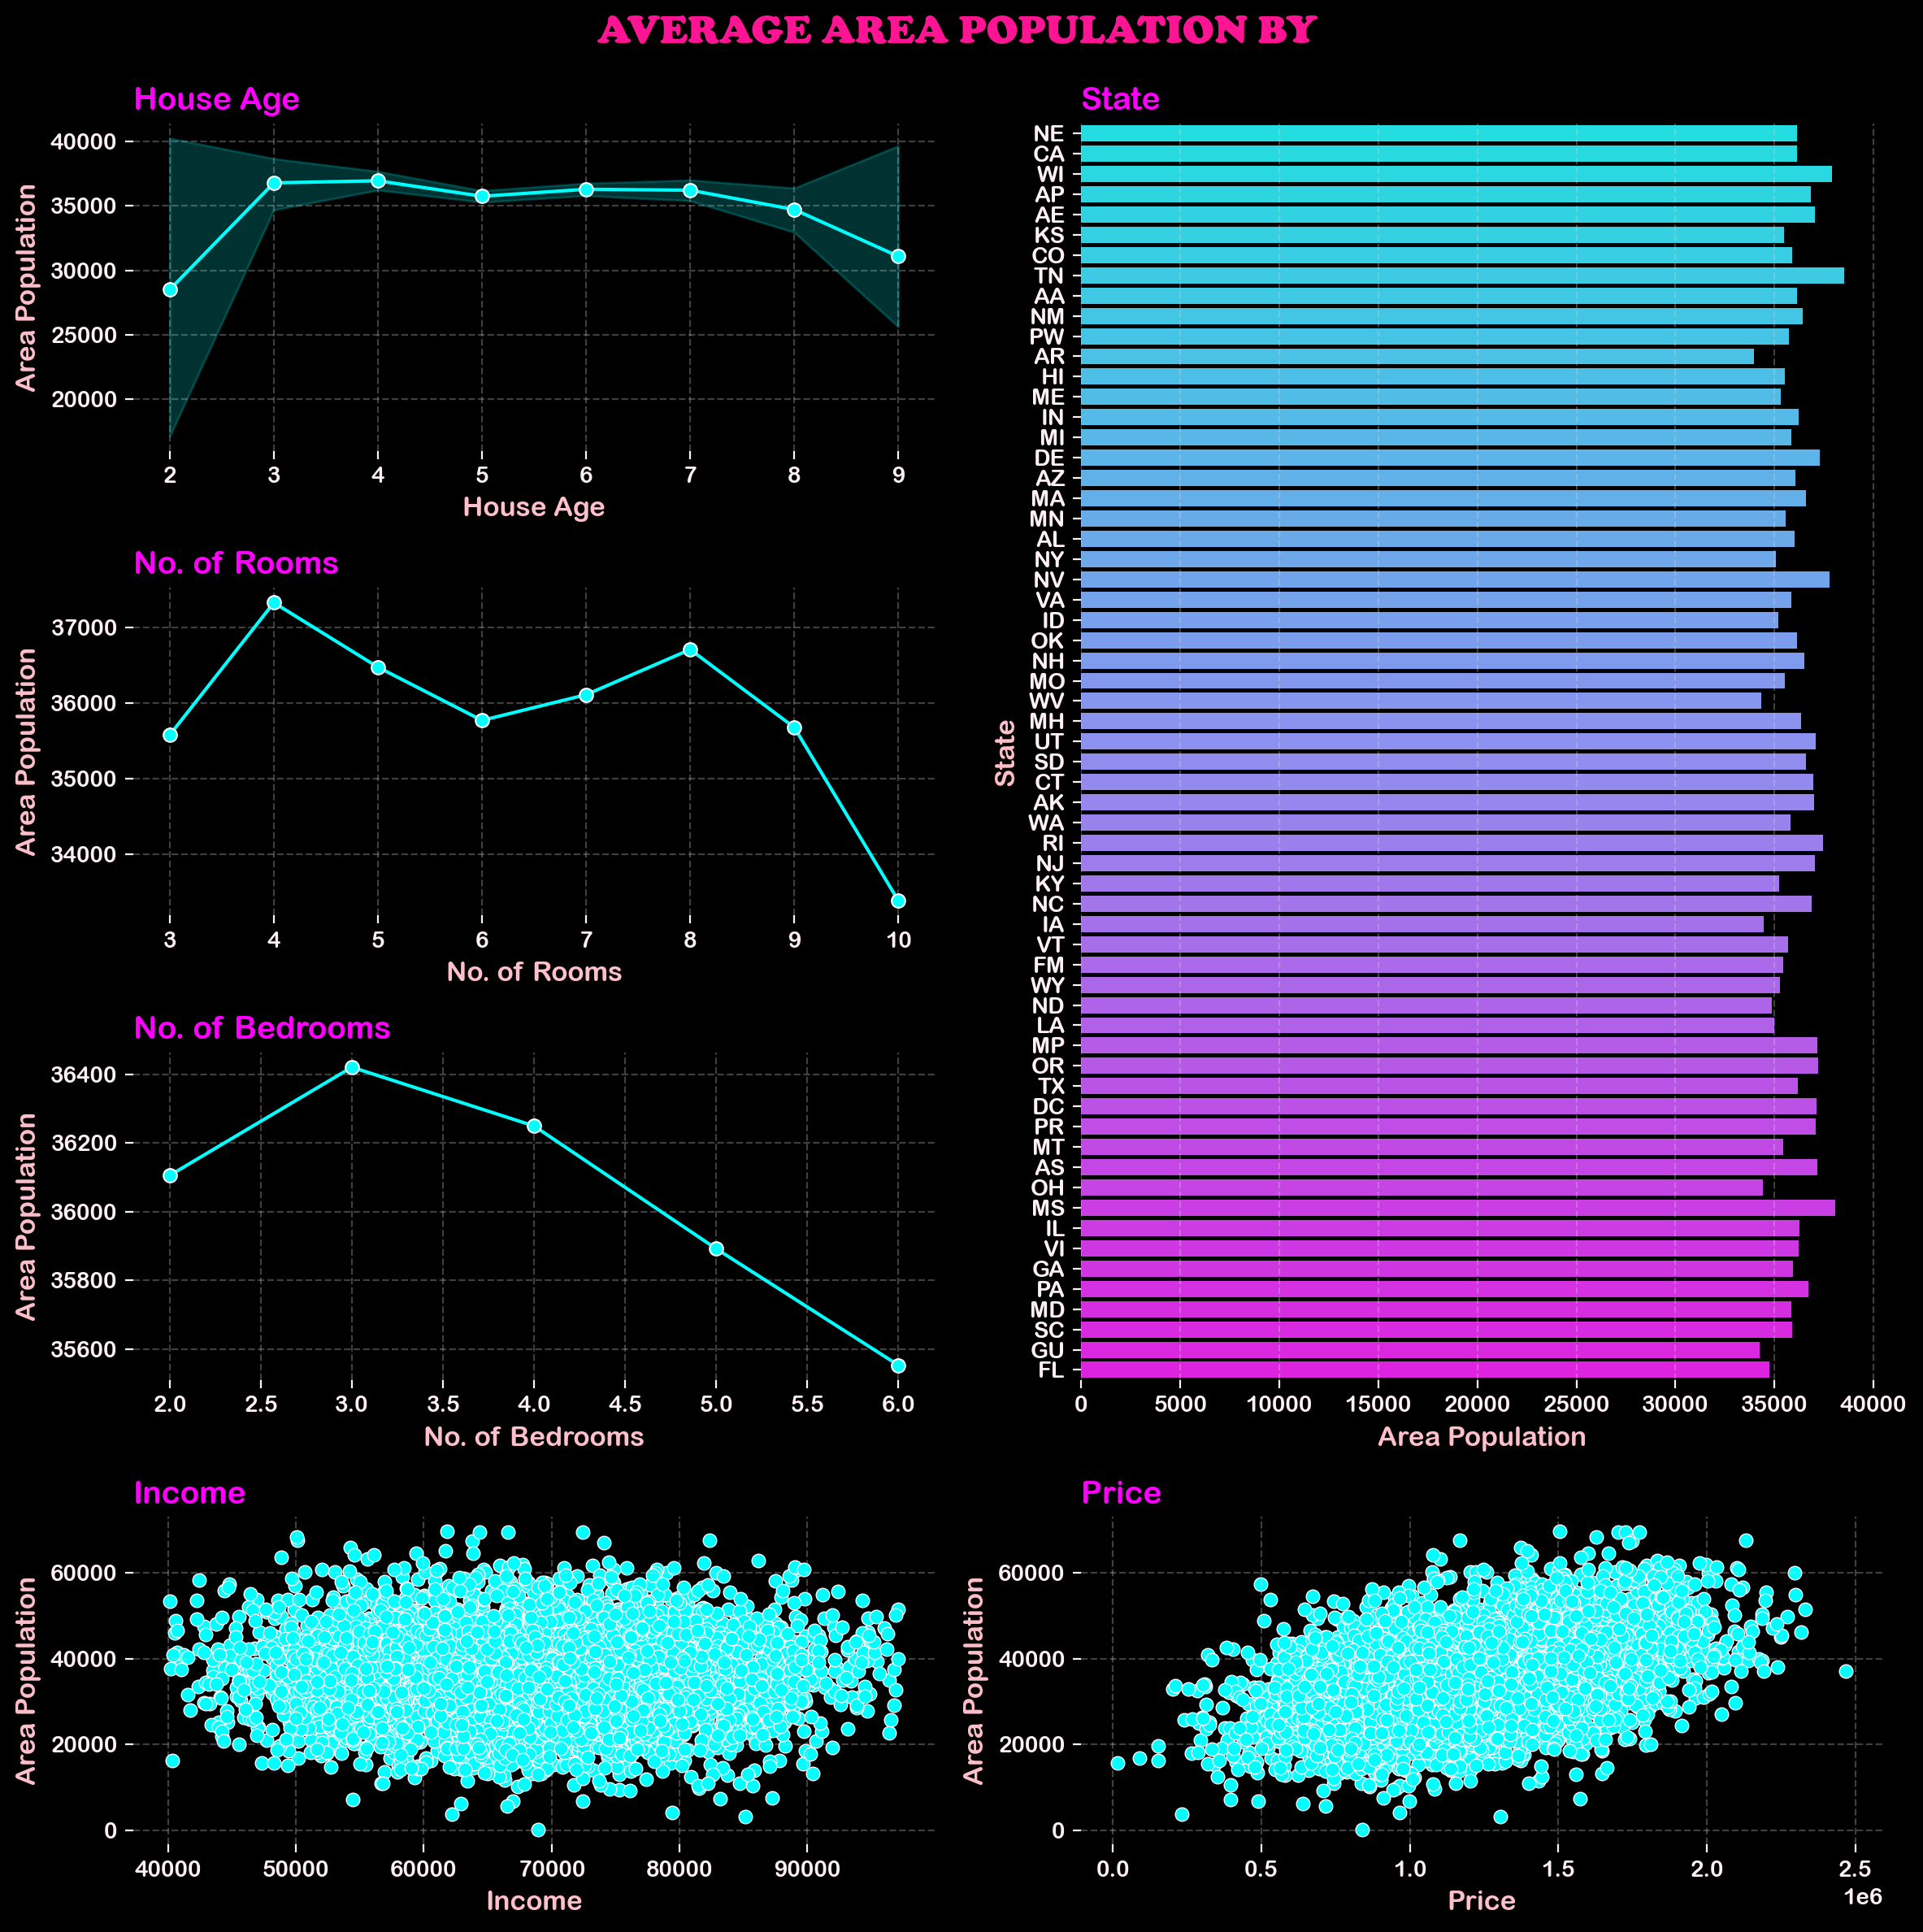

In [25]:
# Analysing Area Population data with other columns

plt.figure(figsize = (12, 12), layout = 'tight')
plt.suptitle('AVERAGE AREA POPULATION BY ', fontsize = 18, fontweight = 'bold', font = 'cooper black', color = 'deeppink',
                                        ha = 'center', va = 'center')

# Area Population by House Age
plt.subplot(4,2,1)
sns.lineplot('House Age','Area Population', data = data, color = 'cyan', marker = '.', markersize = 12)
plt.title('House Age', loc = 'left')

# Area Population by No. of Rooms
plt.subplot(4,2,3)
sns.lineplot('No. of Rooms','Area Population', data = data, ci = None,  color = 'cyan', marker = '.', markersize = 12)
plt.title('No. of Rooms', loc = 'left')

# Area Population by No. of Bedrooms
plt.subplot(4,2,5)
sns.lineplot('No. of Bedrooms','Area Population', data = data, ci = None,  color = 'cyan', marker = '.', markersize = 12)
plt.title('No. of Bedrooms', loc = 'left')

# Area Population State
plt.subplot(4,2, (2,6))
sns.barplot('Area Population', 'State',data = data, ci = None, palette = 'cool')
plt.title('State', loc = 'left')

# Area Population by Income
plt.subplot(4,2,7)
sns.scatterplot('Income', 'Area Population', data = data, color = 'cyan')
plt.title('Income', loc = 'left')

# Area Population by Price
plt.subplot(4,2,8)
sns.scatterplot('Price', 'Area Population', data = data, color = 'cyan')
plt.title('Price', loc = 'left')

plt.show()

### State

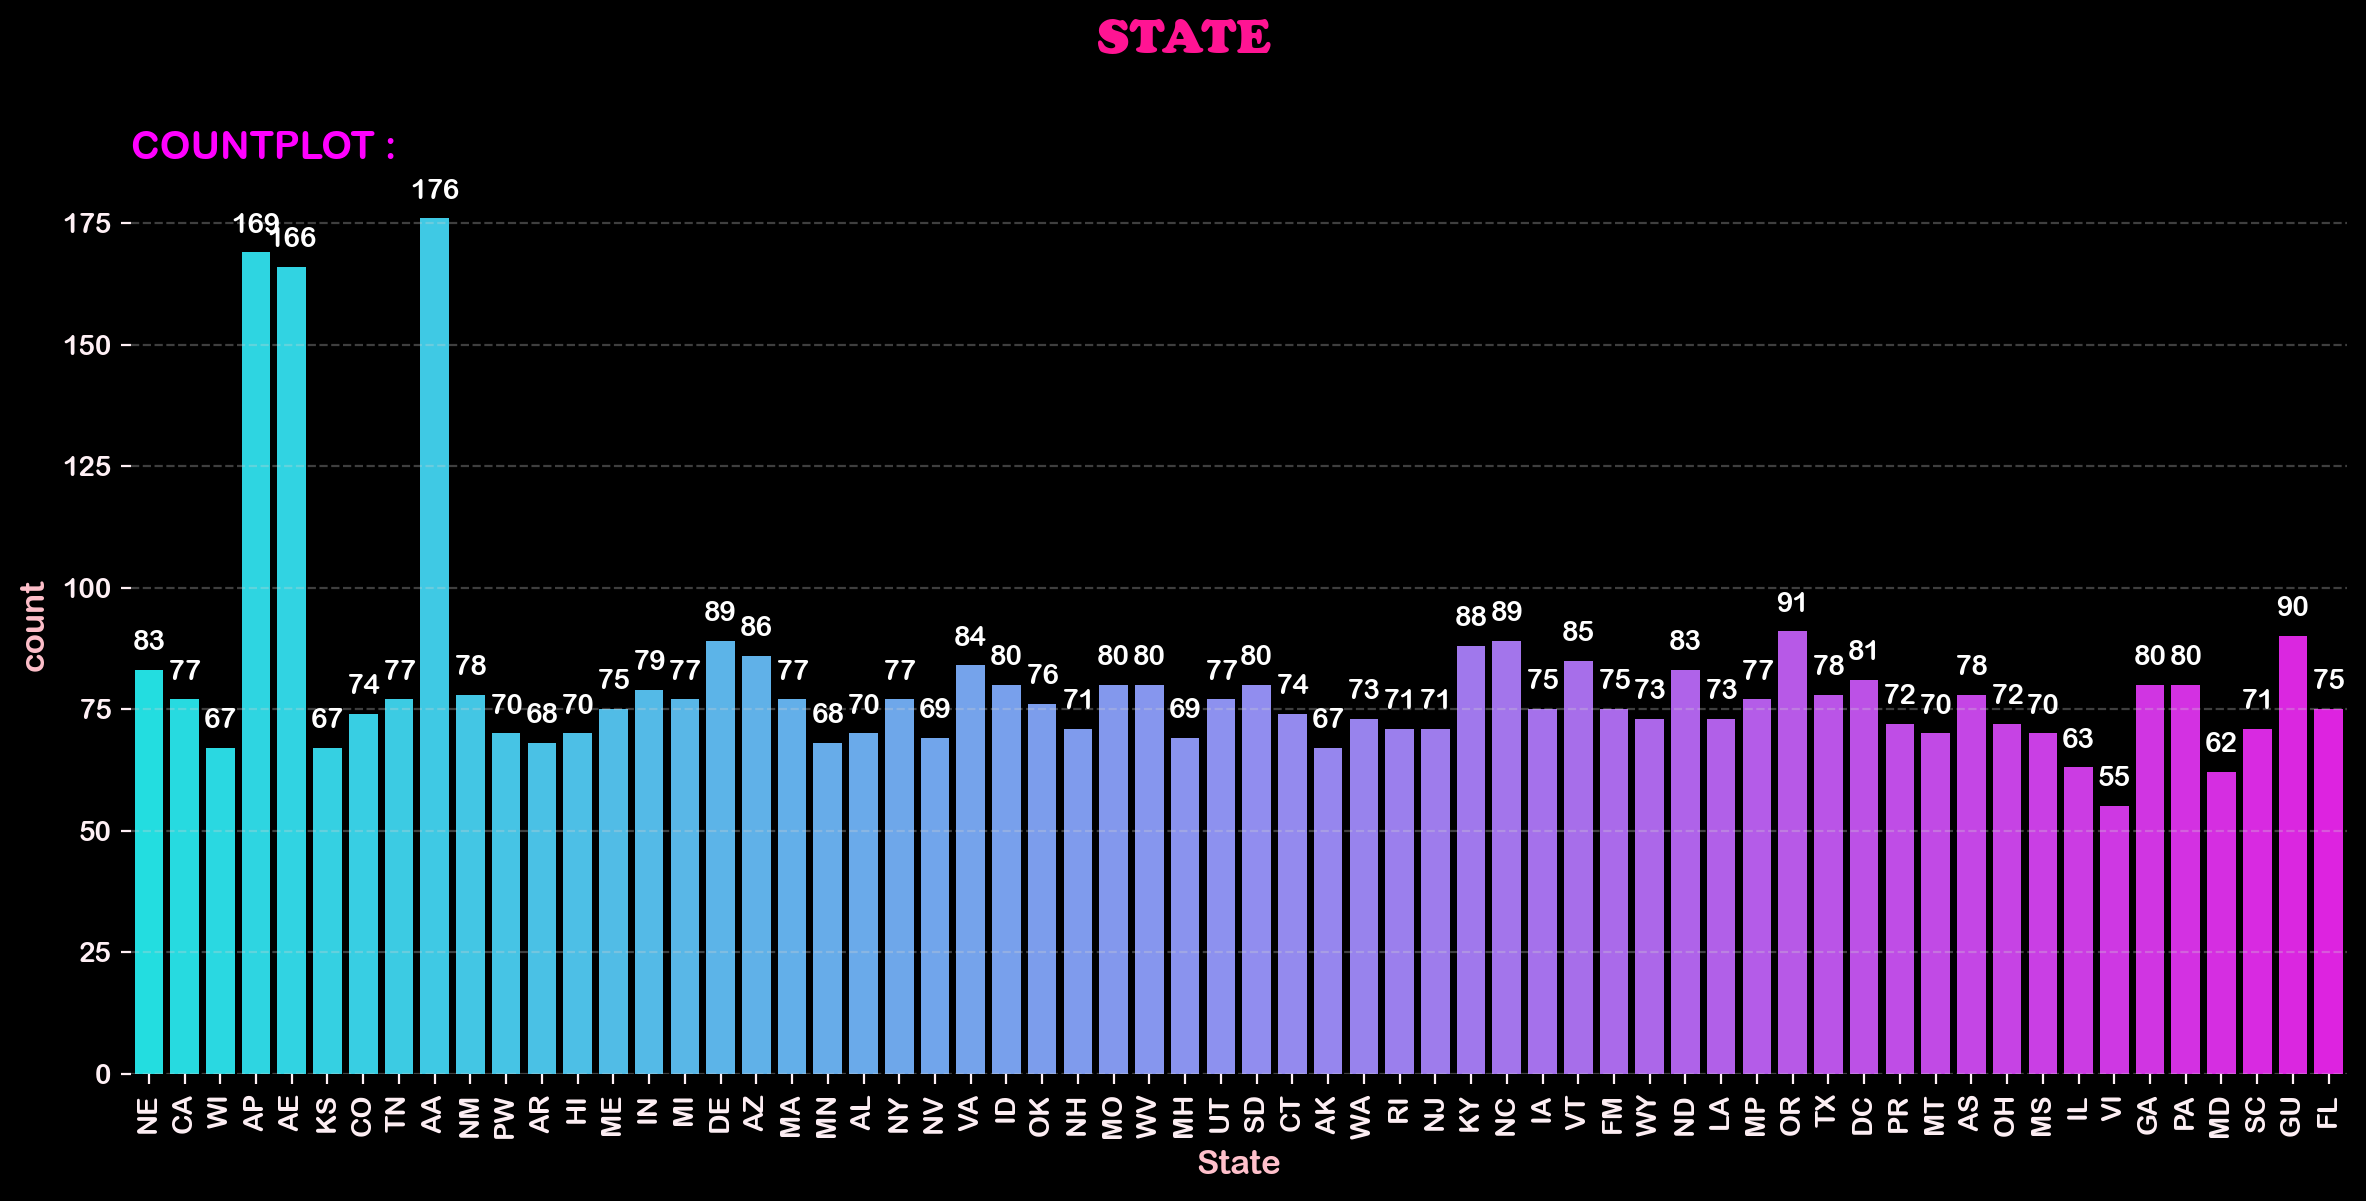

In [26]:
# State data Distribution
plt.figure(figsize = (12, 6), layout = 'tight')
plt.suptitle('STATE', fontsize = 18, fontweight = 'bold', font = 'cooper black', color = 'deeppink',
                                        ha = 'center', va = 'center')

plt.subplot(1,1,1)
ax = sns.countplot(data['State'], palette = 'cool')
for i in ax.containers:
    ax.bar_label(i, fontsize = 10, rotation = 0, padding = 5)
plt.title('COUNTPLOT :', loc = 'left', )
plt.xticks(rotation = 90)

plt.show()

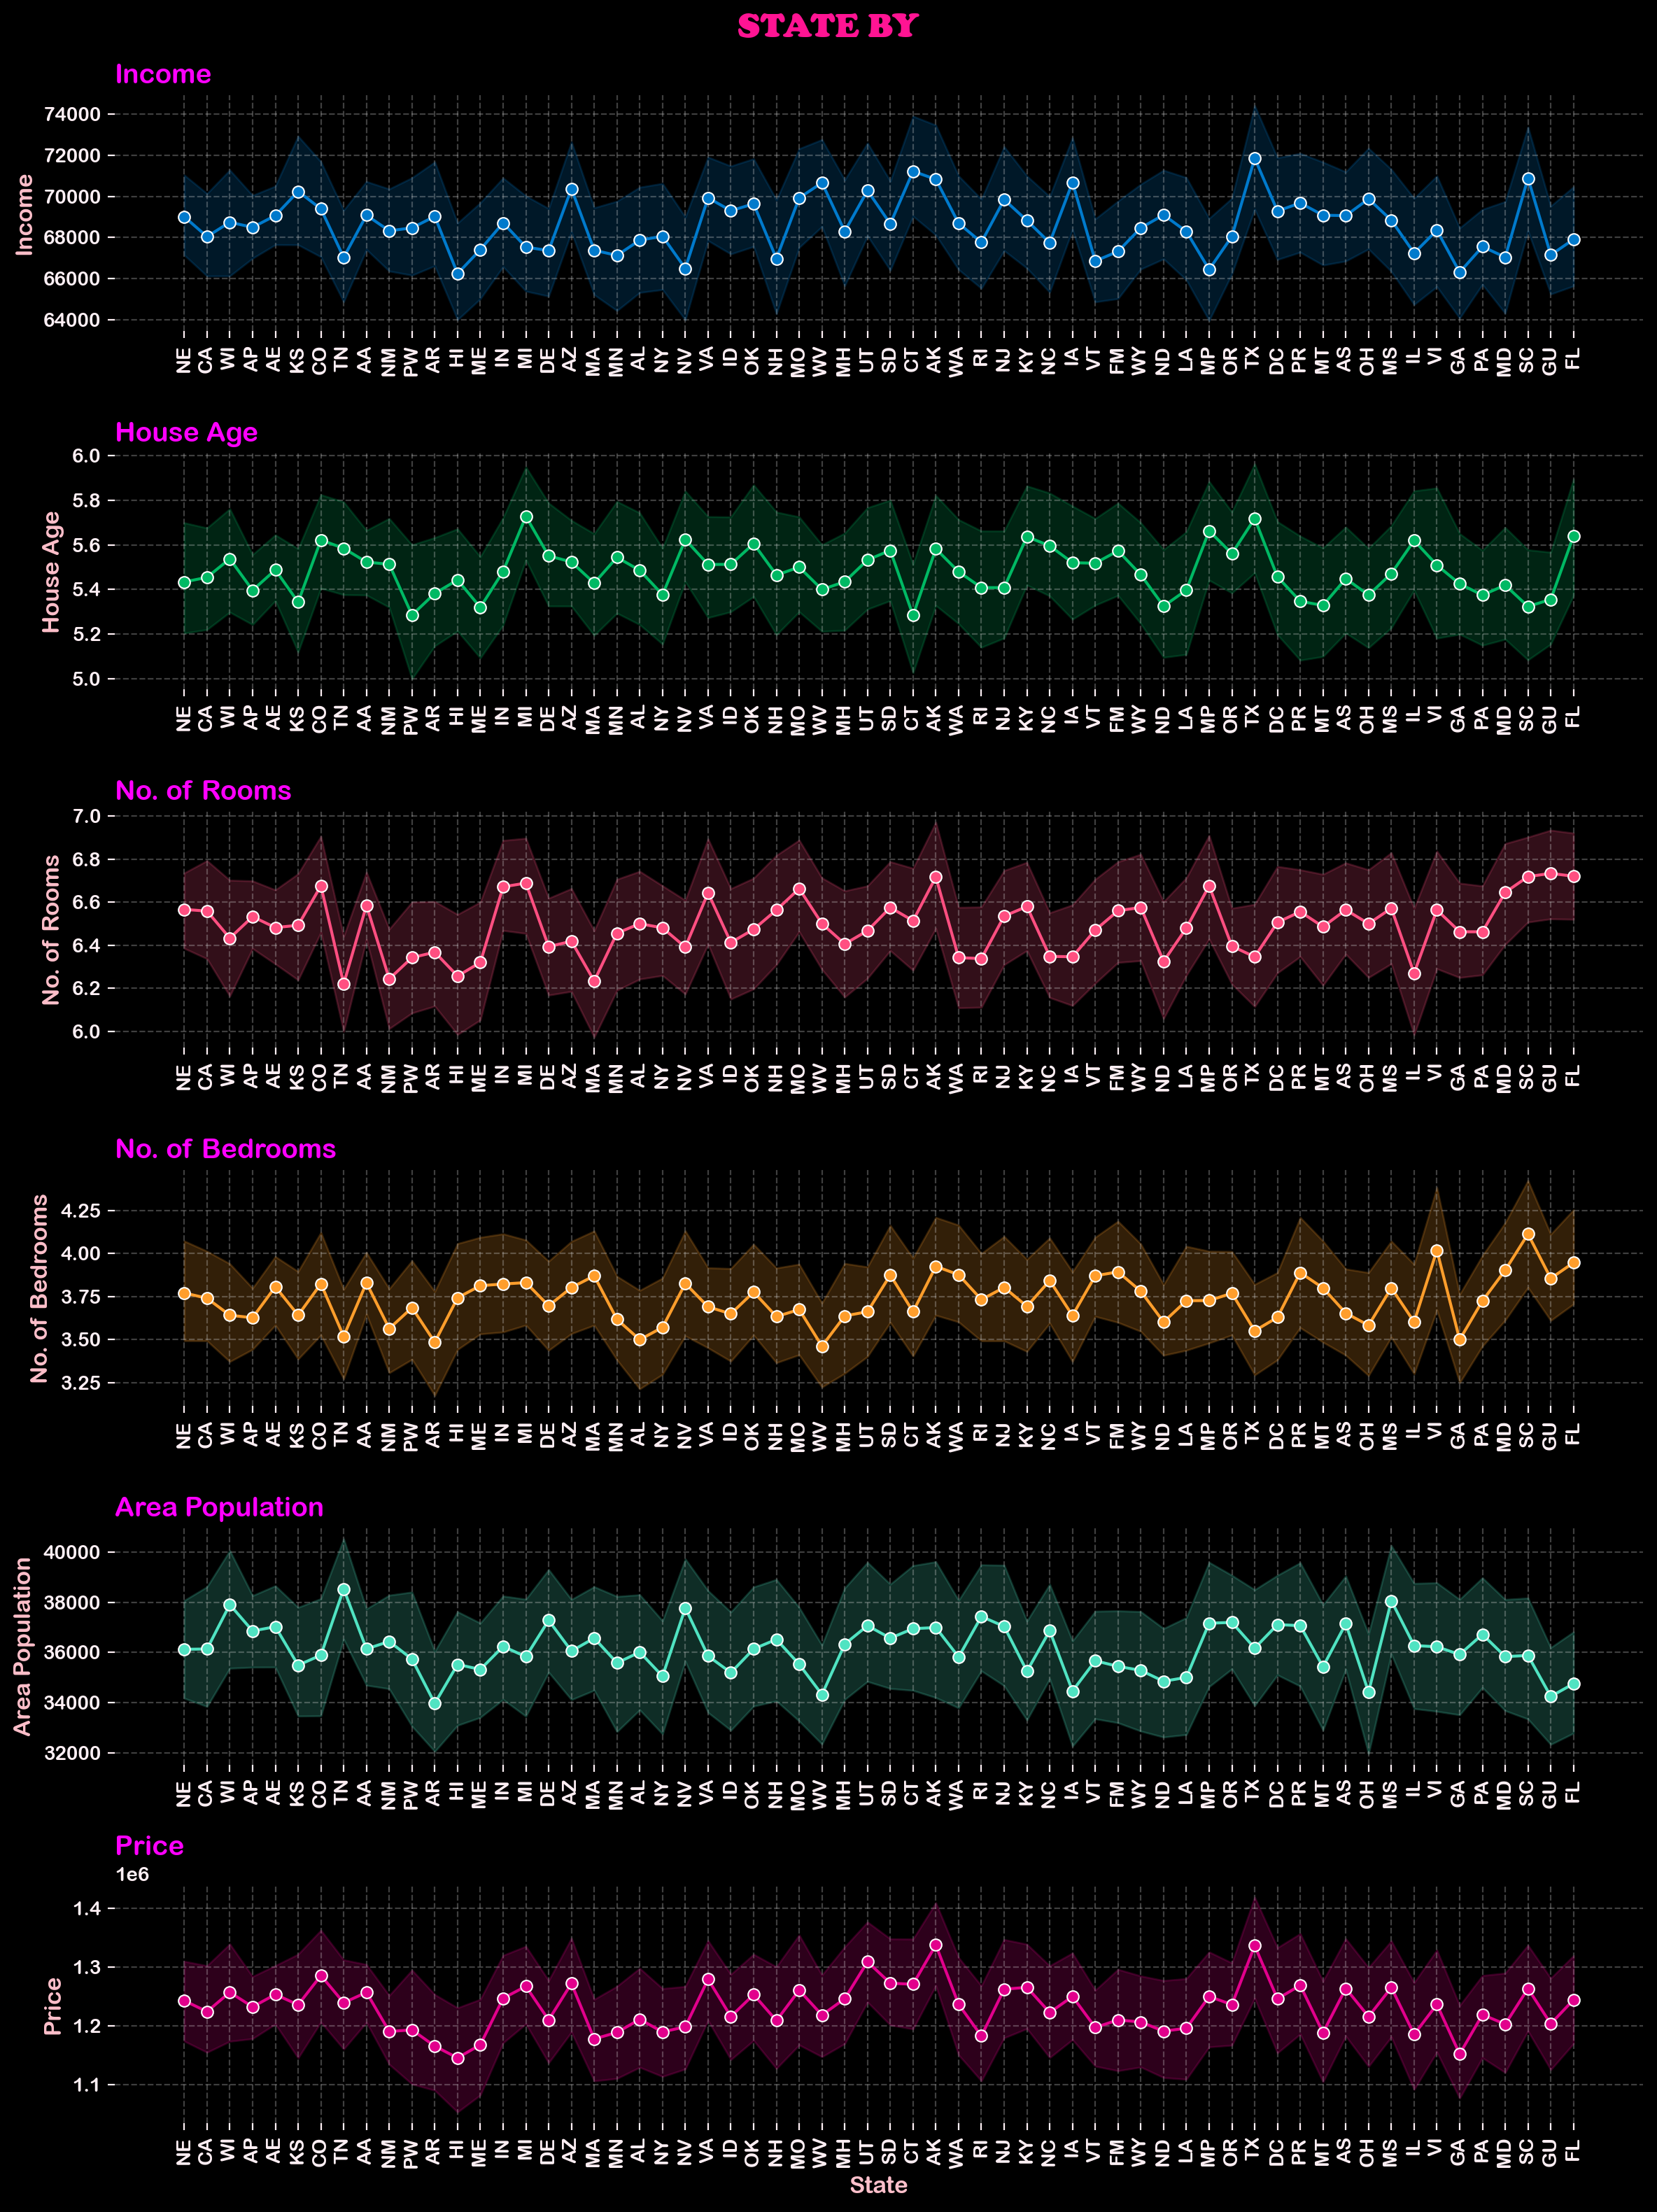

In [27]:
# Analysing State data with other columns
plt.figure(figsize = (12, 16), layout = 'tight')
plt.suptitle('STATE BY', fontsize = 18, fontweight = 'bold', font = 'cooper black', color = 'deeppink',
                                        ha = 'center', va = 'center')

cols = ['Income', 'House Age', 'No. of Rooms', 'No. of Bedrooms','Area Population', 'Price']

for i in range(len(cols)):
    plt.subplot(6,1,i+1)
    sns.lineplot('State', cols[i], data = data, color = color_cycle[i], marker = '.', markersize = 12)
    plt.title(cols[i], loc = 'left')
    plt.xticks(rotation = 90)
    plt.xlabel(None)
    
plt.xlabel('State')
plt.show()

### Price

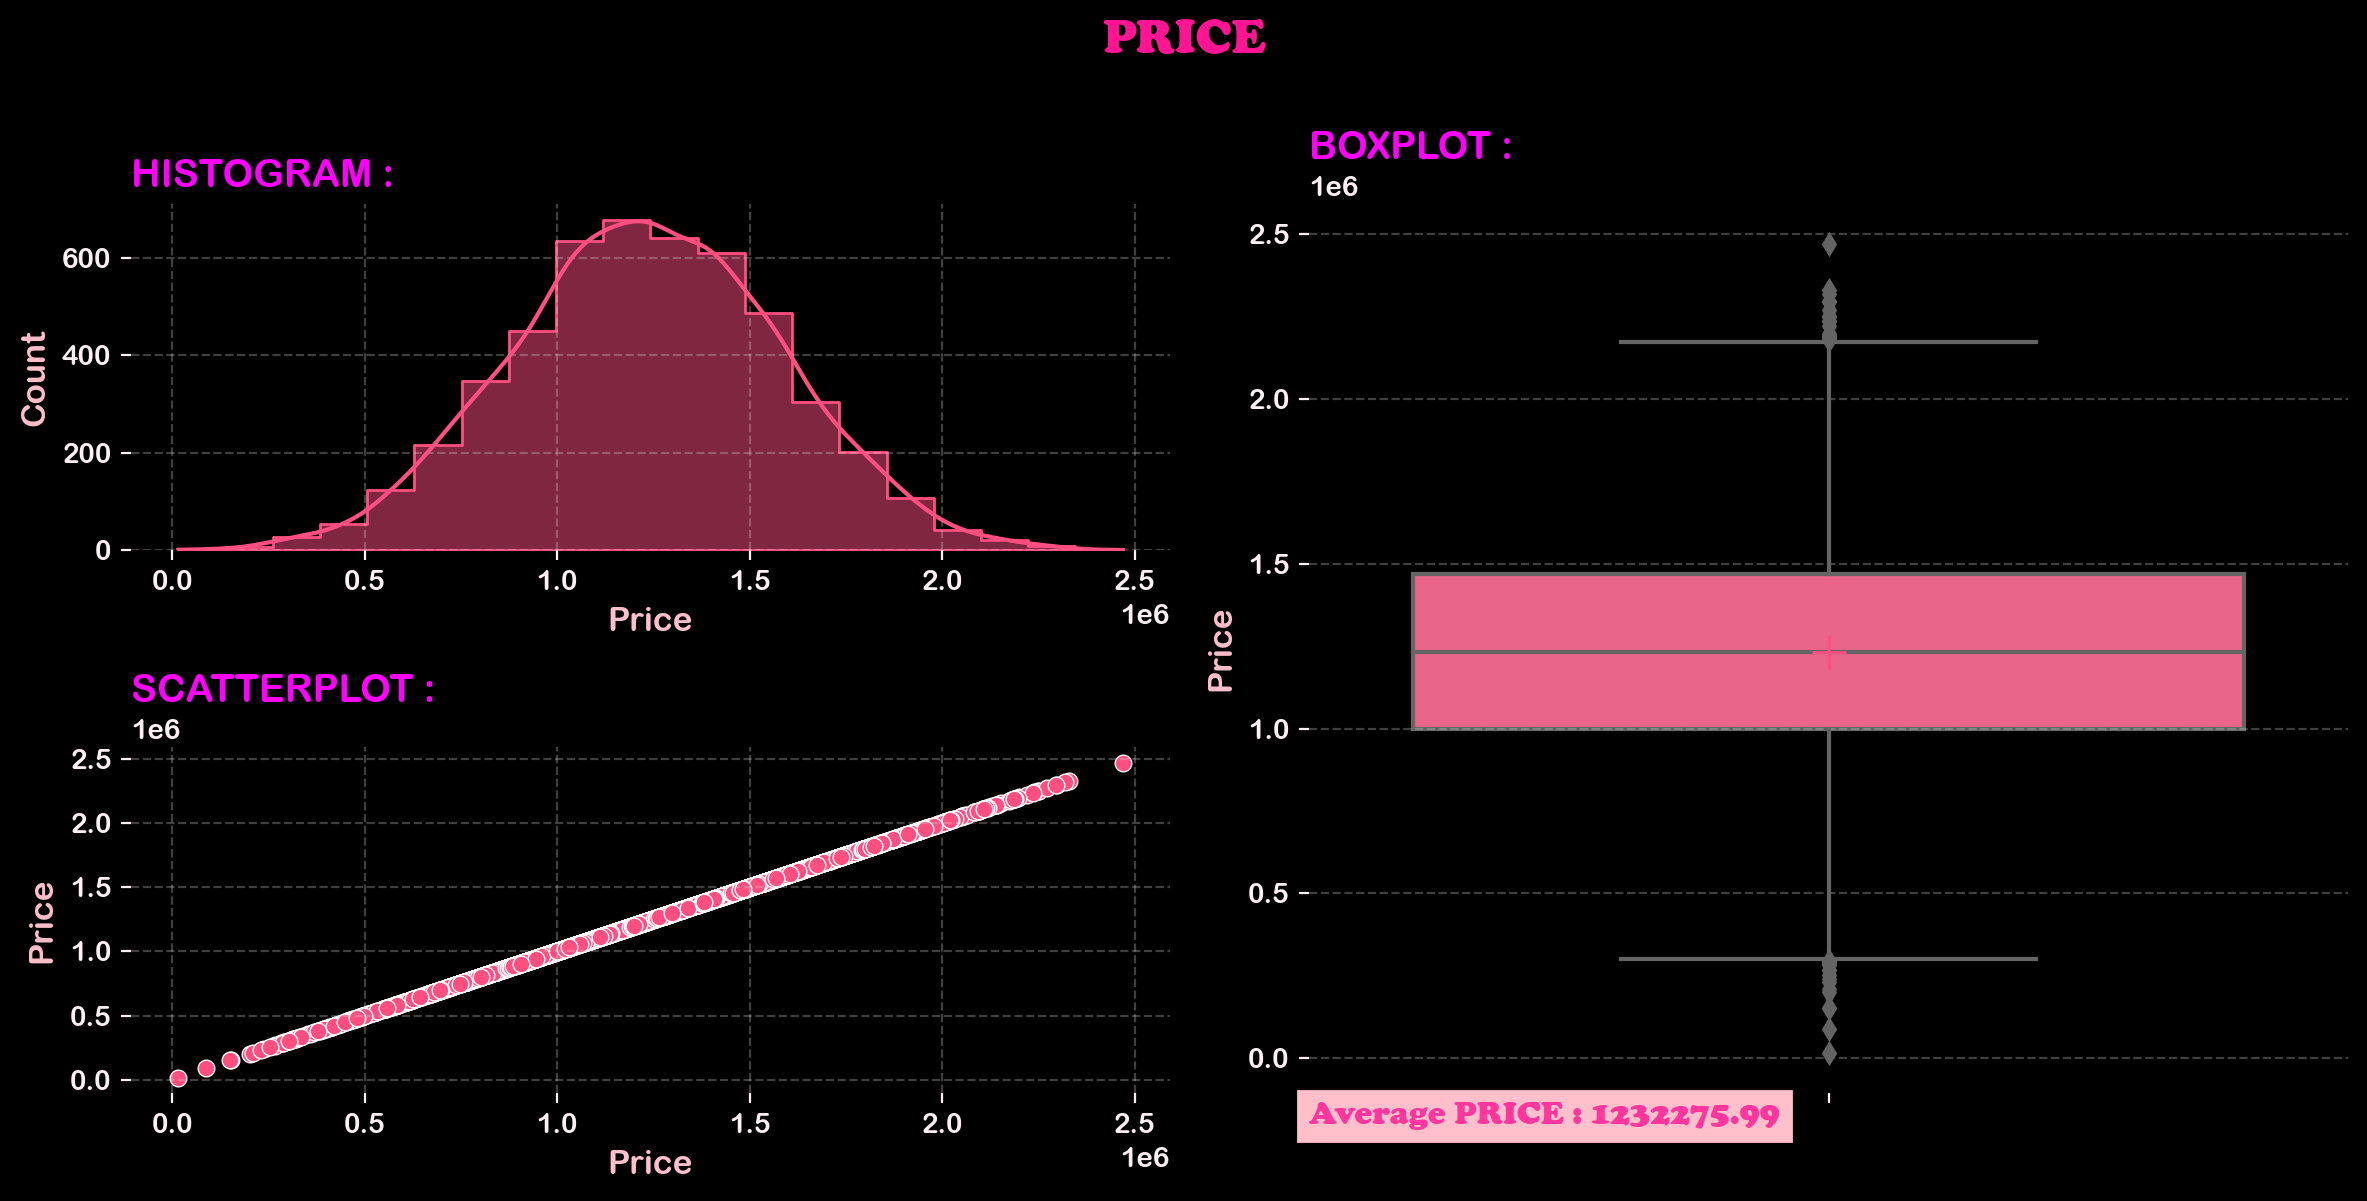

In [28]:
# Price data Distribution
plt.figure(figsize = (12, 6), layout = 'tight')
plt.suptitle('PRICE', fontsize = 18, fontweight = 'bold', font = 'cooper black', color = 'deeppink',
                                        ha = 'center', va = 'center')

# Histogram
plt.subplot(2,2,1)
sns.histplot(x = 'Price',  data = data, kde = True, bins = 20, element = 'step', color = color_cycle[2])
plt.title('HISTOGRAM :', loc = 'left')

# Boxplot
plt.subplot(2,2,(2,4))
sns.boxplot( y = 'Price', data = data, color = color_cycle[2], 
            showmeans = True, meanprops = {'color' : 'red', 'marker' : '+', 'markersize' : 12}) 
plt.xlabel(None)
plt.title('BOXPLOT :', loc = 'left')

avg_price = data['Price'].mean().round(2)
plt.text(-0.5, -0.2 * 10**6, s = f'Average PRICE : {avg_price}', color = 'deeppink',
         fontweight = 'bold', fontsize = 12, alpha = 0.8, backgroundcolor = 'pink', font = 'cooper black')

# Scatterplot
plt.subplot(2,2,3)
sns.scatterplot('Price', 'Price', data = data, color = color_cycle[2])
plt.title('SCATTERPLOT :', loc = 'left')

plt.show()

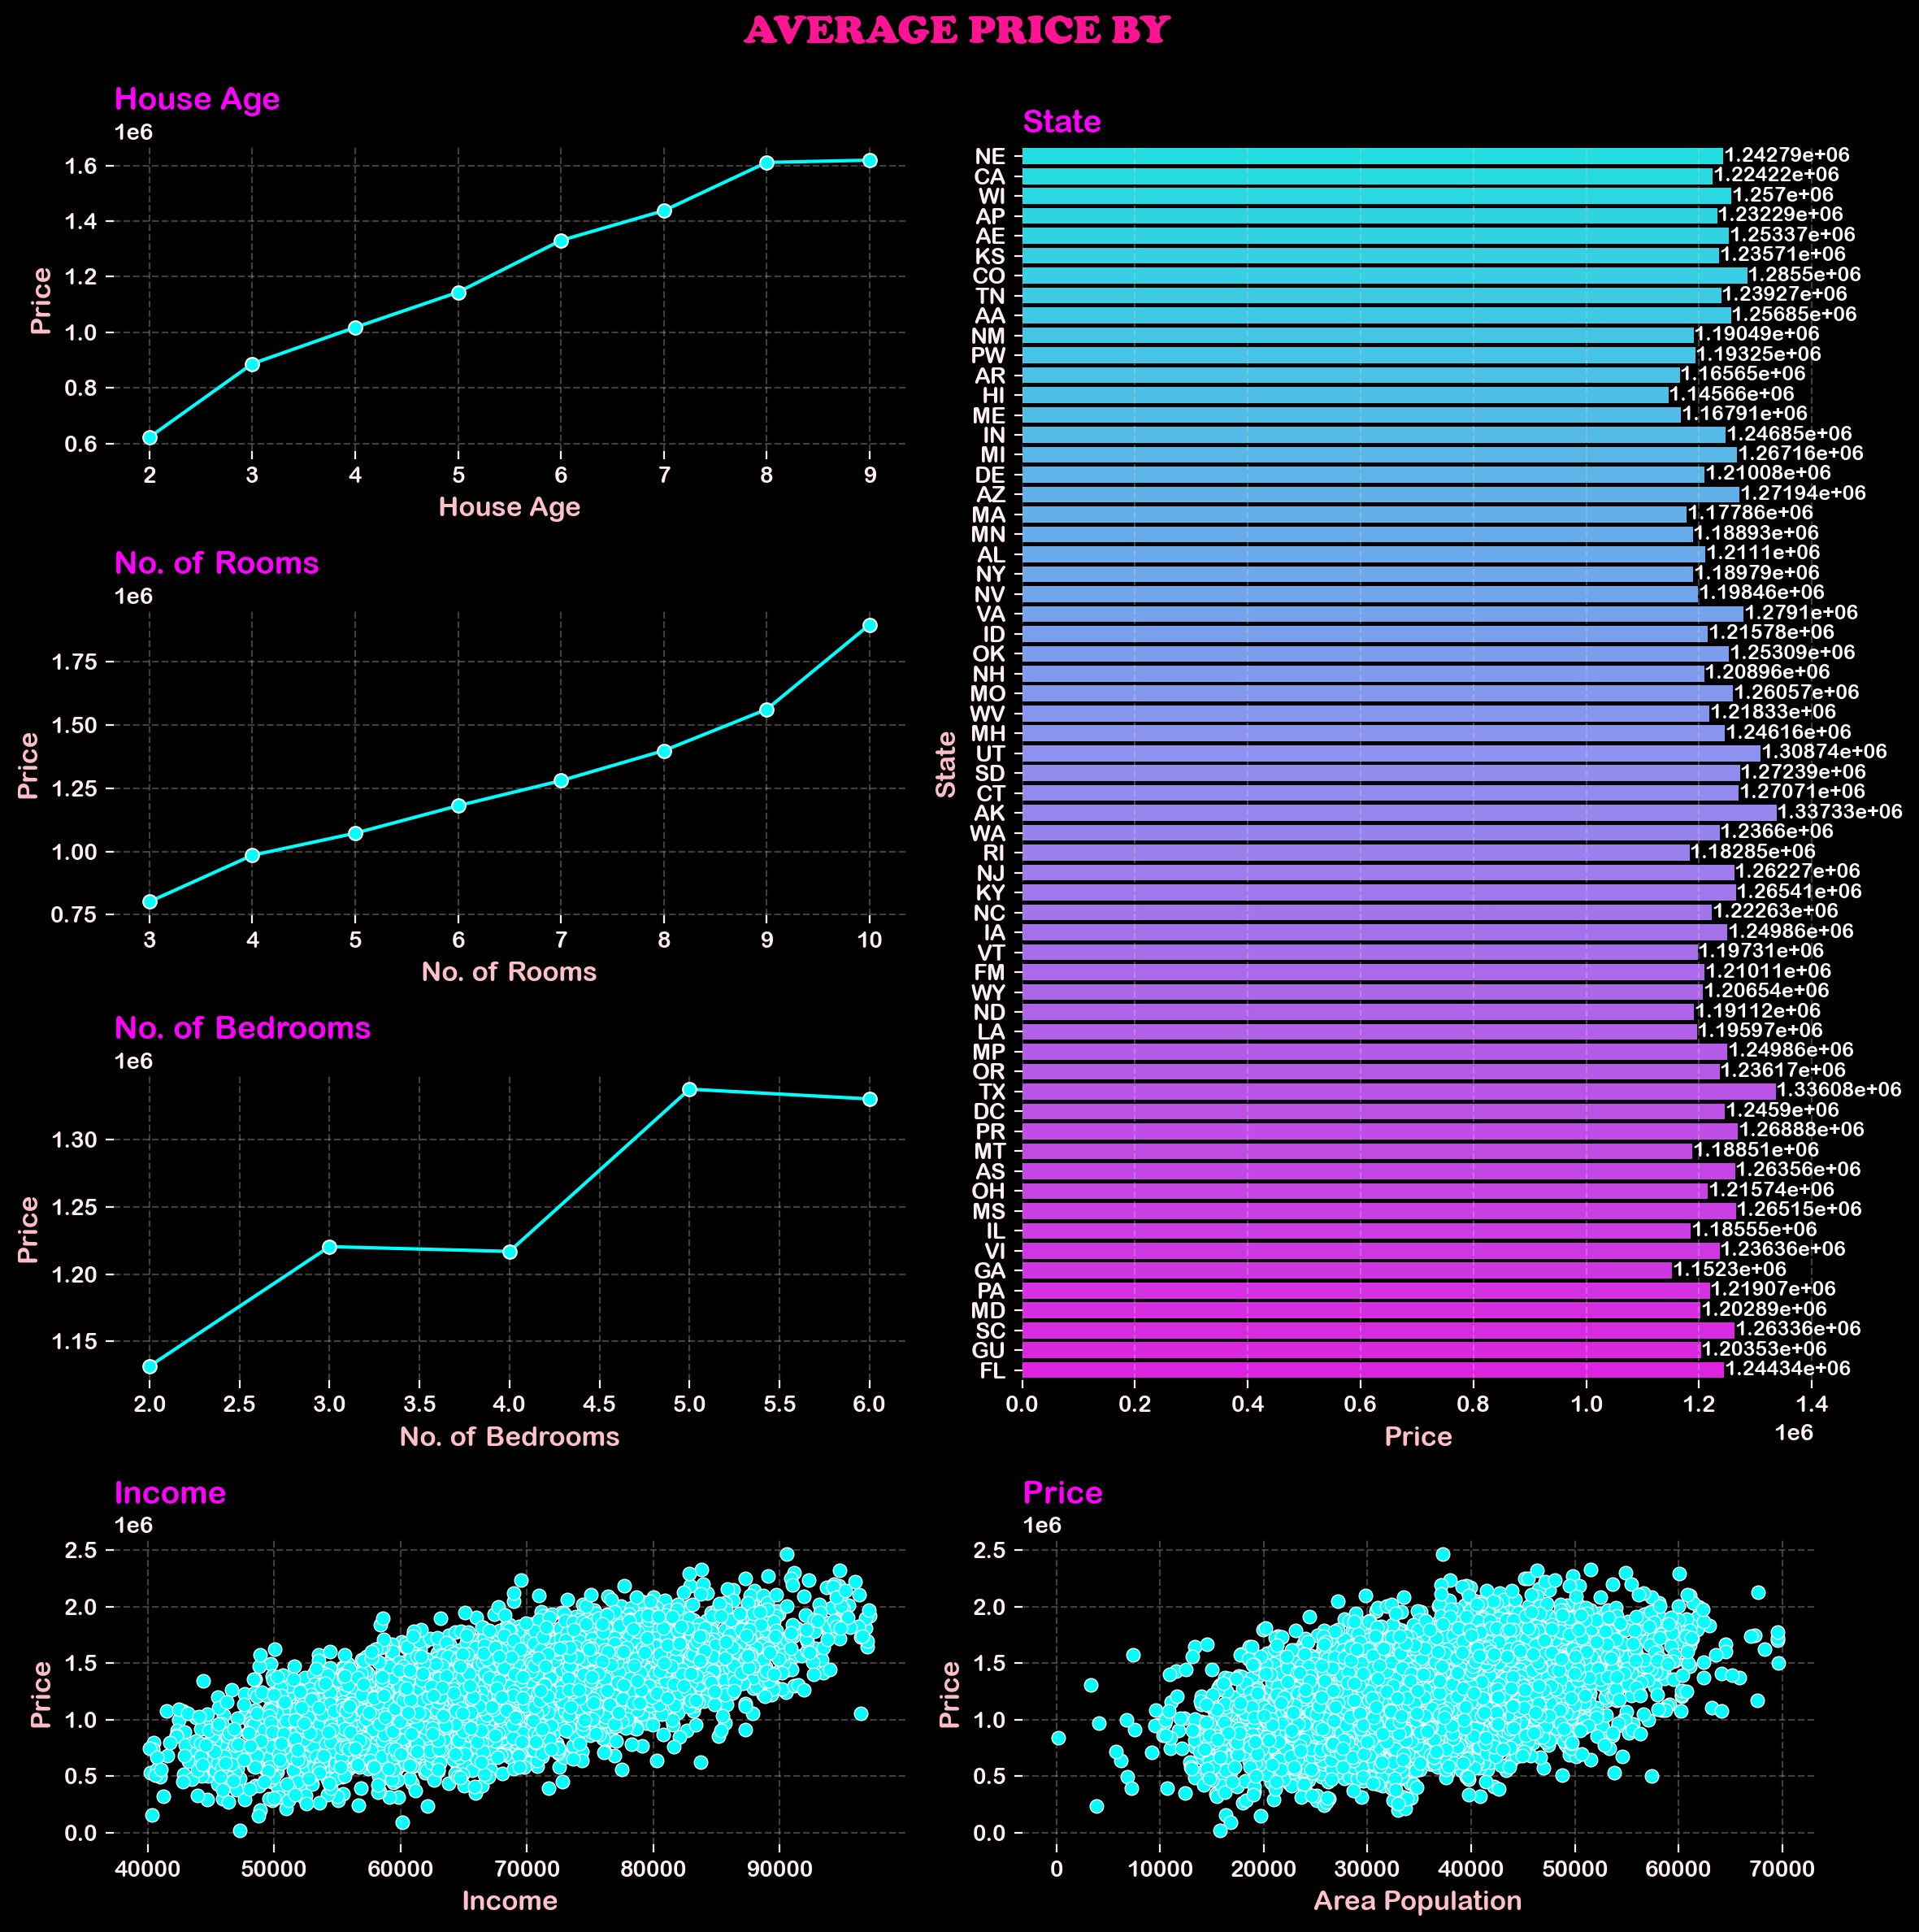

In [29]:
# Analysing Price data with other columns
plt.figure(figsize = (12, 12), layout = 'tight')
plt.suptitle('AVERAGE PRICE BY ', fontsize = 18, fontweight = 'bold', font = 'cooper black', color = 'deeppink',
                                        ha = 'center', va = 'center')

# Price by House Age
plt.subplot(4,2,1)
ax = sns.lineplot('House Age','Price', data = data, ci = None,color = 'cyan', marker = '.', markersize = 12)
plt.title('House Age', loc = 'left')

# Price by No. of Rooms
plt.subplot(4,2,3)
ax = sns.lineplot('No. of Rooms','Price', data = data, ci = None, color = 'cyan', marker = '.', markersize = 12)
plt.title('No. of Rooms', loc = 'left')

# Price by No. of Bedrooms
plt.subplot(4,2,5)
ax = sns.lineplot('No. of Bedrooms','Price', data = data, ci = None, color = 'cyan', marker = '.', markersize = 12)
plt.title('No. of Bedrooms', loc = 'left')

# Price by State
plt.subplot(4,2, (2,6))
ax = sns.barplot('Price', 'State',data = data, ci = None, palette = 'cool')
for i in ax.containers:
    ax.bar_label(i, fontsize = 9, )
plt.title('State', loc = 'left')

# Price by Income
plt.subplot(4,2,7)
sns.scatterplot('Income', 'Price', data = data, color = 'cyan')
plt.title('Income', loc = 'left')

# Price by Area Population
plt.subplot(4,2,8)
sns.scatterplot('Area Population', 'Price', data = data, color = 'cyan')
plt.title('Price', loc = 'left')

plt.show()

In [30]:
# Creating different dataframes for dependent and independent features
X = data.drop(['Price'], axis = 1)
Y = data[['Price']].values

In [31]:
#Categorical data Preprocessing
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X[['State']] = encoder.fit_transform(X[['State']])

In [32]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [33]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .25, random_state = 42)

In [34]:
# Checking shape of training and testing sets
print('Training Data Set    : ', x_train.shape)
print('Training Target Set : ', y_train.shape)
print('Testing Data Set     : ', x_test.shape)
print('Testing Target Set  : ', y_test.shape)

Training Data Set    :  (3726, 6)
Training Target Set :  (3726, 1)
Testing Data Set     :  (1242, 6)
Testing Target Set  :  (1242, 1)


#### Let's try different machine learning algorithms to predict the house price


## Linear Regression

In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [36]:
from sklearn.linear_model import LinearRegression
lr_regressor = LinearRegression()
lr_regressor.fit(x_train, y_train)

lr_pred_train = lr_regressor.predict(x_train)
lr_pred_test  = lr_regressor.predict(x_test)

print('Training Set Score  : ', r2_score(y_train, lr_pred_train))
print('Testing Set Score   : ', r2_score(y_test, lr_pred_test))
print()
print('Mean Absolute Error     : ', mean_absolute_error(y_test, lr_pred_test))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, lr_pred_test)))

Training Set Score  :  0.8905002469900768
Testing Set Score   :  0.8917690850152453

Mean Absolute Error     :  91454.87849921426
Root Mean Squared Error :  114314.2685868476


### SGD Regressor

In [37]:
from sklearn.linear_model import SGDRegressor
sg_regressor = SGDRegressor(alpha = 0.0005)
sg_regressor.fit(x_train, y_train)

sg_pred_train = sg_regressor.predict(x_train)
sg_pred_test  = sg_regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, sg_pred_train))
print('Testing Set Score  : ', r2_score(y_test, sg_pred_test))
print()
print('Mean Absolute Error     : ', mean_absolute_error(y_test, sg_pred_test))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, sg_pred_test)))

Training Set Score :  0.8894380678379991
Testing Set Score  :  0.8911163229828911

Mean Absolute Error     :  91672.66011866216
Root Mean Squared Error :  114658.47634072951


### Ridge 

In [38]:
from sklearn.linear_model import Ridge
ri_regressor = Ridge(alpha = 1, random_state=42)
ri_regressor.fit(x_train, y_train)

ri_pred_train = ri_regressor.predict(x_train)
ri_pred_test = ri_regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, ri_pred_train))
print('Testing Set Score  : ', r2_score(y_test, ri_pred_test))
print()
print('Mean Absolute Error     : ', mean_absolute_error(y_test, ri_pred_test))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, ri_pred_test)))

Training Set Score :  0.890389193475713
Testing Set Score  :  0.8917924348322422

Mean Absolute Error     :  91424.90211341843
Root Mean Squared Error :  114301.93679961163


### Lasso

In [39]:
from sklearn.linear_model import Lasso
ls_regressor = Lasso(alpha = 1.5,  max_iter= 1000, random_state=100)
ls_regressor.fit(x_train, y_train)

ls_pred_train = ls_regressor.predict(x_train)
ls_pred_test = ls_regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, ls_pred_train))
print('Testing Set Score  : ', r2_score(y_test, ls_pred_test))
print()
print('Mean Absolute Error     : ', mean_absolute_error(y_test, ls_pred_test))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, ls_pred_test)))

Training Set Score :  0.8905002442030276
Testing Set Score  :  0.891769877762548

Mean Absolute Error     :  91454.36936564675
Root Mean Squared Error :  114313.84993338786


## Polynomial Regression


In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_poly3_train = poly.fit_transform(x_train)
x_poly3_test = poly.fit_transform(x_test)

In [41]:
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3_train, y_train)

poly3_pred_train = poly_reg3.predict(x_poly3_train)
poly3_pred_test  = poly_reg3.predict(x_poly3_test)

print('Training Set Score : ', r2_score(y_train, poly3_pred_train))
print('Testing Set Score  : ', r2_score(y_test, poly3_pred_test))
print()
print('Mean Absolute Error     : ', mean_absolute_error(y_test, poly3_pred_test))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, poly3_pred_test)))

Training Set Score :  0.8912328266624383
Testing Set Score  :  0.8909526734523131

Mean Absolute Error     :  91730.76234483434
Root Mean Squared Error :  114744.60844634274


## Decision Trees


In [42]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(max_depth = 20000,  random_state = 100)
dt_regressor.fit(x_train, y_train)

dt_pred_train = dt_regressor.predict(x_train)
dt_pred_test  = dt_regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, dt_pred_train))
print('Testing Set Score  : ', r2_score(y_test, dt_pred_test))
print()
print('Mean Absolute Error     : ', mean_absolute_error(y_test, dt_pred_test))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, dt_pred_test)))

Training Set Score :  1.0
Testing Set Score  :  0.7066620561116099

Mean Absolute Error     :  148563.75443333897
Root Mean Squared Error :  188195.3544261027


## Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators= 2500, max_depth= 200, random_state=100)
rf_regressor.fit(x_train, y_train)

rf_pred_train = rf_regressor.predict(x_train)
rf_pred_test = rf_regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, rf_pred_train))
print('Testing Set Score  : ', r2_score(y_test, rf_pred_test))
print()
print('Mean Absolute Error     : ', mean_absolute_error(y_test, rf_pred_test))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, rf_pred_test)))

Training Set Score :  0.9790470269733098
Testing Set Score  :  0.8547262886184128

Mean Absolute Error     :  105186.78308403901
Root Mean Squared Error :  132439.73188178457


## XGBoost Regressor


In [44]:
from xgboost import XGBRegressor
xg_regressor = XGBRegressor(n_estimators = 1500, max_depth = 200, random_state = 42, learning_rate = 0.005)
xg_regressor.fit(x_train, y_train)

xg_pred_train = xg_regressor.predict(x_train)
xg_pred_test = xg_regressor.predict(x_test)

print('Training set score : ', r2_score(y_train, xg_pred_train))
print('Testing set score  : ', r2_score(y_test, xg_pred_test))
print()
print('Mean Absolute Error     : ', mean_absolute_error(y_test, xg_pred_test))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, xg_pred_test)))

Training set score :  0.9998033892251094
Testing set score  :  0.8547317307608866

Mean Absolute Error     :  105215.95839117334
Root Mean Squared Error :  132437.25117611018


## LightGBM Regressor

In [45]:
from lightgbm import LGBMRegressor
lg_regressor = LGBMRegressor(n_estimators = 100, max_depth = 200, random_state = 42, learning_rate = 0.05)
lg_regressor.fit(x_train, y_train)

lg_pred_train = lg_regressor.predict(x_train)
lg_pred_test = lg_regressor.predict(x_test)

print('Training set score : ', r2_score(y_train, lg_pred_train))
print('Testing set score  : ', r2_score(y_test, lg_pred_test))
print()
print('Mean Absolute Error     : ', mean_absolute_error(y_test, lg_pred_test))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, lg_pred_test)))

Training set score :  0.911857539625226
Testing set score  :  0.8760683056915428

Mean Absolute Error     :  97104.94046494413
Root Mean Squared Error :  122325.21014600774


## Adaboost Regressor

In [46]:
estimator = Ridge(alpha = 0.1)

from sklearn.ensemble import AdaBoostRegressor
ad_regressor = AdaBoostRegressor(estimator, n_estimators = 250,  random_state = 20, learning_rate = 0.5)
ad_regressor.fit(x_train, y_train)

ad_pred_train = ad_regressor.predict(x_train)
ad_pred_test = ad_regressor.predict(x_test)

print('Training set score : ', r2_score(y_train, ad_pred_train))
print('Testing set score  : ', r2_score(y_test, ad_pred_test))
print()
print('Mean Absolute Error     : ', mean_absolute_error(y_test, ad_pred_test))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, ad_pred_test)))

Training set score :  0.8904136287542396
Testing set score  :  0.8917920447243356

Mean Absolute Error     :  91456.92152831433
Root Mean Squared Error :  114302.14283903703


In [47]:
from sklearn.ensemble import VotingRegressor
vt_regressor = VotingRegressor(estimators = [('lr', lr_regressor),
                                             ('sg',sg_regressor),
                                             ('ri', ri_regressor),
                                             ('ls', ls_regressor),
                                             ('po', poly_reg3),
                                             ('rf', rf_regressor),
                                             ('xg', xg_regressor),
                                             ('lg', lg_regressor),
                                             ('ad', ad_regressor)])

vt_regressor.fit(x_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('sg', SGDRegressor(alpha=0.0005)),
                            ('ri', Ridge(alpha=1, random_state=42)),
                            ('ls', Lasso(alpha=1.5, random_state=100)),
                            ('po', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(max_depth=200,
                                                   n_estimators=2500,
                                                   random_state=100)),
                            ('xg',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylev...
                                          max_delta_step=None, max_depth=200,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,

In [48]:
vt_pred_train = vt_regressor.predict(x_train)
vt_pred_test = vt_regressor.predict(x_test)

print('Training Set Score :', r2_score(y_train, vt_pred_train))
print('Testing Set Score  :', r2_score(y_test, vt_pred_test))

print()
print('Mean Absolute Error     : ', mean_absolute_error(y_test, vt_pred_test))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, vt_pred_test)))

Training Set Score : 0.9285518360890651
Testing Set Score  : 0.8889845494578124

Mean Absolute Error     :  92324.5352746761
Root Mean Squared Error :  115775.4532425248


#### After trying different regression algorithms, it is observed that linear regression models gave better results than decision trees and random forest.
#### The voting regressor model has the better r2 score than other models, hence it can be used as final model

In [49]:
final_model = vt_regressor

In [50]:
final_model.predict([[0.8643696, 0.7142857, 0.2857143, 0.5      , 0.7597662,
       0.3114754]])

array([1933293.35538823])